### Test Data Wrangling A2 ###

In [1]:
from pylab import *
from Bio import SeqIO
import matplotlib.pyplot as plt
from Bio.PDB import PDBParser
from Bio.PDB.DSSP import DSSP
import pandas as pd
import re
import numpy as np
pd.options.mode.chained_assignment = None 
import io
from io import StringIO

In [2]:
# C:\\Users\\ahmad\\Dropbox\\PC\\Documents\\QMUL\\Research Project\\Proteomics\\Proteomics-extended\\data\\proteusAll.tsv
# C:\\Users\\ahmad\\Documents\\QMUL\\Research Project\\Proteomics\\Proteomics-extended\\data\\proteusAllA2.tsv
Data=input("please load data:")
df = pd.read_csv(Data, sep="\t" ,low_memory=False) # read in the dataframe
df

please load data: C:\\Users\\ahmad\\Documents\\QMUL\\Research Project\\Proteomics\\Proteomics-extended\\data\\proteusAllA2.tsv


,Sequence,Modified sequence,Modifications,Leading razor protein,Proteins,Experiment,Charge,Reverse,Potential contaminant,Intensity
0,AAAAAAAAAAAAAAAGAGAGAK,_AAAAAAAAAAAAAAAGAGAGAK_,Unmodified,SLC12A2,SLC12A2,FWD;Nsi,2,NaN,NaN,20146000.0
1,AAAAAAAAAAAAAAAGAGAGAK,_AAAAAAAAAAAAAAAGAGAGAK_,Unmodified,SLC12A2,SLC12A2,FWD;si,2,NaN,NaN,32829000.0
2,AAAAAAAAAAAAAAAGAGAGAK,_AAAAAAAAAAAAAAAGAGAGAK_,Unmodified,SLC12A2,SLC12A2,FWD;Nsi,3,NaN,NaN,10067000.0
3,AAAAAAAAAAAAAAAGAGAGAK,_AAAAAAAAAAAAAAAGAGAGAK_,Unmodified,SLC12A2,SLC12A2,FWD;si,3,NaN,NaN,14863000.0
4,AAAAAAAAAAAAAAAGAGAGAK,_AAAAAAAAAAAAAAAGAGAGAK_,Unmodified,SLC12A2,SLC12A2,REV;si,2,NaN,NaN,3444200.0
...,...,...,...,...,...,...,...,...,...,...
326829,YYYIPQYK,_YYYIPQYK_,Unmodified,NDUFAF2,NDUFAF2,FWD;si,2,NaN,NaN,52491000.0
326830,YYYIPQYK,_YYYIPQYK_,Unmodified,NDUFAF2,NDUFAF2,REV;si,2,NaN,NaN,82419000.0
326831,YYYIPQYK,_YYYIPQYK_,Unmodified,NDUFAF2,NDUFAF2,REV;Nsi,2,NaN,NaN,78846000.0
326832,YYYIPQYK,_YYYIPQYK_,Unmodified,NDUFAF2,NDUFAF2,REV;si,2,NaN,NaN,4190700.0


In [3]:
df = df.drop_duplicates(subset='Sequence', keep="first") #REMOVE DUPLICATES

In [4]:
all_protein= []   #list of protein names
for proteins in df['Proteins']:
    all_protein.append(proteins.split(","))

In [5]:
protein_names = [] #list of all unique protein names
for p in all_protein:
    if p not in protein_names:
        protein_names.append(p)

In [6]:
len(all_protein)

56422

In [7]:
len(protein_names)

6569

In [8]:
with open('protein_names.txt', 'w') as f: #write protein names to file
    for proteins in protein_names: #for each protein in the list
        for protein in proteins: #for each protein in the list
            f.write("%s\n" % protein) #write each protein to file

In [9]:
df= df.filter(['Sequence', 'Proteins', 'Modifications']) #filter dataframe to only include protein names and sequences
df

,Sequence,Proteins,Modifications
0,AAAAAAAAAAAAAAAGAGAGAK,SLC12A2,Unmodified
6,AAAAAAAAAAGAAGGR,PABPN1,Acetyl (Protein N-term)
10,AAAAAAAAAAR,ARID1B,Unmodified
12,AAAAAAAAAVSR,MSTRG.6309,Unmodified
16,AAAAAAAGDSDSWDADAFSVEDPVRK,EIF3J,Acetyl (Protein N-term)
...,...,...,...
326766,YYVTIIDAPGHRDFIK,EEF1A1P9,Unmodified
326818,YYYAVVDCDSPETASK,MSTRG.18384,Unmodified
326820,YYYAVYDMVVR,LAMB1,Unmodified
326824,YYYDGDMICK,GABPA,Unmodified


In [10]:
# C:\\Users\\ahmad\\Dropbox\\PC\\Documents\\QMUL\\Research Project\\Proteomics\\Proteomics-extended\\data\\UniProtKB-Swiss-Prot\\ID.tsv
#C:\\Users\\ahmad\\Documents\\QMUL\\Research Project\\Proteomics\\Proteomics-extended\\data\\UniProtKB-Swiss-Prot\\ID_A2.tsv
IDs=input("please load IDs:")
proteinID = pd.read_csv(IDs, sep="\t") #read in protein ID file
proteinID=proteinID.rename(columns={'From': 'ProteinID'})
proteinID

please load IDs: C:\\Users\\ahmad\\Documents\\QMUL\\Research Project\\Proteomics\\Proteomics-extended\\data\\UniProtKB-Swiss-Prot\\ID_A2.tsv


,ProteinID,Entry
0,SLC12A2,P55011
1,PABPN1,Q86U42
2,ARID1B,Q8NFD5
3,EIF3J,O75822
4,RPL4,P36578
...,...,...
5835,SMPDL3A,Q92484
5836,MALSU1,Q96EH3
5837,PERP,Q96FX8
5838,CC2D2A,Q9P2K1


In [11]:
proteinID = proteinID.drop_duplicates(subset='ProteinID', keep="first")
proteinID.to_csv('ID_A2.tsv', sep="\t", index=False)
proteinID

,ProteinID,Entry
0,SLC12A2,P55011
1,PABPN1,Q86U42
2,ARID1B,Q8NFD5
3,EIF3J,O75822
4,RPL4,P36578
...,...,...
5835,SMPDL3A,Q92484
5836,MALSU1,Q96EH3
5837,PERP,Q96FX8
5838,CC2D2A,Q9P2K1


In [12]:
df = df.merge(proteinID, left_on='Proteins', right_on='ProteinID', how='left') #merge protein names with protein ID
df

,Sequence,Proteins,Modifications,ProteinID,Entry
0,AAAAAAAAAAAAAAAGAGAGAK,SLC12A2,Unmodified,SLC12A2,P55011
1,AAAAAAAAAAGAAGGR,PABPN1,Acetyl (Protein N-term),PABPN1,Q86U42
2,AAAAAAAAAAR,ARID1B,Unmodified,ARID1B,Q8NFD5
3,AAAAAAAAAVSR,MSTRG.6309,Unmodified,NaN,NaN
4,AAAAAAAGDSDSWDADAFSVEDPVRK,EIF3J,Acetyl (Protein N-term),EIF3J,O75822
...,...,...,...,...,...
56417,YYVTIIDAPGHRDFIK,EEF1A1P9,Unmodified,NaN,NaN
56418,YYYAVVDCDSPETASK,MSTRG.18384,Unmodified,NaN,NaN
56419,YYYAVYDMVVR,LAMB1,Unmodified,LAMB1,P07942
56420,YYYDGDMICK,GABPA,Unmodified,GABPA,Q06546


In [13]:
df.to_csv('merged_proteinsA2.tsv', sep="\t", index=False) #write merged dataframe to file

In [14]:
df= df.filter(['Sequence', 'Proteins', 'Modifications' , 'Entry']) #remove columns that are not needed
df= df[df['Entry'].notnull()] #remove rows with null values
df

,Sequence,Proteins,Modifications,Entry
0,AAAAAAAAAAAAAAAGAGAGAK,SLC12A2,Unmodified,P55011
1,AAAAAAAAAAGAAGGR,PABPN1,Acetyl (Protein N-term),Q86U42
2,AAAAAAAAAAR,ARID1B,Unmodified,Q8NFD5
4,AAAAAAAGDSDSWDADAFSVEDPVRK,EIF3J,Acetyl (Protein N-term),O75822
5,AAAAAAALQAK,RPL4,Unmodified,P36578
...,...,...,...,...
56414,YYTVFDRDNNR,CTSD,Unmodified,P07339
56415,YYVLNALK,PRPF8,Unmodified,Q6P2Q9
56419,YYYAVYDMVVR,LAMB1,Unmodified,P07942
56420,YYYDGDMICK,GABPA,Unmodified,Q06546


In [15]:
#C:\\Users\\ahmad\\Documents\\QMUL\\Research Project\\Proteomics\\Proteomics-extended\\data\\UniProtKB-Swiss-Prot\\Protein_seq_A2.fasta

# C:\\Users\\ahmad\\Documents\\QMUL\\Research Project\\Proteomics\\Proteomics-extended\\data\\UniProtKB-Swiss-Prot\\protein_seq.fasta
protein_seq=input("please load protein_seq:")


with open(protein_seq) as fasta_file:  # Will close handle cleanly
    identifiers = []
    seq = []
    for seq_record in SeqIO.parse(fasta_file, 'fasta'):  # (generator)
        identifiers.append(seq_record.id)
        seq.append(seq_record.seq)

please load protein_seq: C:\\Users\\ahmad\\Documents\\QMUL\\Research Project\\Proteomics\\Proteomics-extended\\data\\UniProtKB-Swiss-Prot\\Protein_seq_A2.fasta


In [16]:
new_df = pd.DataFrame({'Identifier': identifiers, 'Protein_Sequence': seq}) #create new dataframe with identifiers and sequences

proteinID = r'sp\|(.*)\|.*' #regular expression to extract protein ID
new_df['Identifier'] = [re.sub(proteinID, r'\1', x) for x in new_df['Identifier']] #remove protein ID from identifier

def list_to_string(list):   #convert list to string
    return ','.join(list)   #join list with ','
new_df['Protein_Sequence'] = new_df['Protein_Sequence'].apply(list_to_string) #convert list to string

#df['col'].apply(', '.join)

new_df['Protein_Sequence'] = new_df['Protein_Sequence'].str.replace(',', '') #remove ',' from string
new_df

,Identifier,Protein_Sequence
0,P55011,MEPRPTAPSSGAPGLAGVGETPSAAALAAARVELPGTAVPSVPEDA...
1,Q86U42,MAAAAAAAAAAGAAGGRGSGPGRRRHLVPGAGGEAGEGAPGGAGDY...
2,Q8NFD5,MAARAAAAAAAAAARARARAGSGERRAPPGPRPAPGARDLEAGARG...
3,O75822,MAAAAAAAGDSDSWDADAFSVEDPVRKVGGGGTAGGDRWEGEDEDE...
4,P36578,MACARPLISVYSEKGESSGKNVTLPAVFKAPIRPDIVNFVHTNLRK...
...,...,...
5835,Q92484,MALVRALVCCLLTAWHCRSGLGLPVAPAGGRNPPPAIGQFWHVTDL...
5836,Q96EH3,MGPGGRVARLLAPLMWRRAVSSVAGSAVGAEPGLRLLAVQRLPVGA...
5837,Q96FX8,MIRCGLACERCRWILPLLLLSAIAFDIIALAGRGWLQSSDHGQTSS...
5838,Q9P2K1,MNPREEKVKIITEEFIENDEDADMGRQNKNSKVRRQPRKKQPPTAV...


In [17]:
new_df.to_csv('check_seq_A2.tsv', sep="\t", index=False) 

In [18]:
#df = df.merge(proteinID, left_on='Proteins', right_on='ProteinID', how='left') #merge protein names with protein ID


df= df.merge(new_df, left_on='Entry', right_on='Identifier', how='left') #merge protein names with protein ID
df

,Sequence,Proteins,Modifications,Entry,Identifier,Protein_Sequence
0,AAAAAAAAAAAAAAAGAGAGAK,SLC12A2,Unmodified,P55011,P55011,MEPRPTAPSSGAPGLAGVGETPSAAALAAARVELPGTAVPSVPEDA...
1,AAAAAAAAAAGAAGGR,PABPN1,Acetyl (Protein N-term),Q86U42,Q86U42,MAAAAAAAAAAGAAGGRGSGPGRRRHLVPGAGGEAGEGAPGGAGDY...
2,AAAAAAAAAAR,ARID1B,Unmodified,Q8NFD5,Q8NFD5,MAARAAAAAAAAAARARARAGSGERRAPPGPRPAPGARDLEAGARG...
3,AAAAAAAGDSDSWDADAFSVEDPVRK,EIF3J,Acetyl (Protein N-term),O75822,O75822,MAAAAAAAGDSDSWDADAFSVEDPVRKVGGGGTAGGDRWEGEDEDE...
4,AAAAAAALQAK,RPL4,Unmodified,P36578,P36578,MACARPLISVYSEKGESSGKNVTLPAVFKAPIRPDIVNFVHTNLRK...
...,...,...,...,...,...,...
53210,YYTVFDRDNNR,CTSD,Unmodified,P07339,P07339,MQPSSLLPLALCLLAAPASALVRIPLHKFTSIRRTMSEVGGSVEDL...
53211,YYVLNALK,PRPF8,Unmodified,Q6P2Q9,Q6P2Q9,MAGVFPYRGPGNPVPGPLAPLPDYMSEEKLQEKARKWQQLQAKRYA...
53212,YYYAVYDMVVR,LAMB1,Unmodified,P07942,P07942,MGLLQLLAFSFLALCRARVRAQEPEFSYGCAEGSCYPATGDLLIGR...
53213,YYYDGDMICK,GABPA,Unmodified,Q06546,Q06546,MTKREAEELIEIEIDGTEKAECTEESIVEQTYAPAECVSQAIDINE...


In [19]:
def check_Sequence_in_Protein_Sequence(row): #function to check if sequence is in full sequence
    if row['Sequence'] in row['Protein_Sequence']:
        return True
    else:
        return False

In [20]:
df['Check'] = df.apply(check_Sequence_in_Protein_Sequence, axis=1) #apply function to dataframe
df

,Sequence,Proteins,Modifications,Entry,Identifier,Protein_Sequence,Check
0,AAAAAAAAAAAAAAAGAGAGAK,SLC12A2,Unmodified,P55011,P55011,MEPRPTAPSSGAPGLAGVGETPSAAALAAARVELPGTAVPSVPEDA...,True
1,AAAAAAAAAAGAAGGR,PABPN1,Acetyl (Protein N-term),Q86U42,Q86U42,MAAAAAAAAAAGAAGGRGSGPGRRRHLVPGAGGEAGEGAPGGAGDY...,True
2,AAAAAAAAAAR,ARID1B,Unmodified,Q8NFD5,Q8NFD5,MAARAAAAAAAAAARARARAGSGERRAPPGPRPAPGARDLEAGARG...,True
3,AAAAAAAGDSDSWDADAFSVEDPVRK,EIF3J,Acetyl (Protein N-term),O75822,O75822,MAAAAAAAGDSDSWDADAFSVEDPVRKVGGGGTAGGDRWEGEDEDE...,True
4,AAAAAAALQAK,RPL4,Unmodified,P36578,P36578,MACARPLISVYSEKGESSGKNVTLPAVFKAPIRPDIVNFVHTNLRK...,True
...,...,...,...,...,...,...,...
53210,YYTVFDRDNNR,CTSD,Unmodified,P07339,P07339,MQPSSLLPLALCLLAAPASALVRIPLHKFTSIRRTMSEVGGSVEDL...,True
53211,YYVLNALK,PRPF8,Unmodified,Q6P2Q9,Q6P2Q9,MAGVFPYRGPGNPVPGPLAPLPDYMSEEKLQEKARKWQQLQAKRYA...,True
53212,YYYAVYDMVVR,LAMB1,Unmodified,P07942,P07942,MGLLQLLAFSFLALCRARVRAQEPEFSYGCAEGSCYPATGDLLIGR...,True
53213,YYYDGDMICK,GABPA,Unmodified,Q06546,Q06546,MTKREAEELIEIEIDGTEKAECTEESIVEQTYAPAECVSQAIDINE...,True


In [21]:
df['Check'].value_counts() #count number of trues and falses

True     51088
False     2127
Name: Check, dtype: int64

In [22]:
df = df[df.Check != False] #remove rows that are false

df

,Sequence,Proteins,Modifications,Entry,Identifier,Protein_Sequence,Check
0,AAAAAAAAAAAAAAAGAGAGAK,SLC12A2,Unmodified,P55011,P55011,MEPRPTAPSSGAPGLAGVGETPSAAALAAARVELPGTAVPSVPEDA...,True
1,AAAAAAAAAAGAAGGR,PABPN1,Acetyl (Protein N-term),Q86U42,Q86U42,MAAAAAAAAAAGAAGGRGSGPGRRRHLVPGAGGEAGEGAPGGAGDY...,True
2,AAAAAAAAAAR,ARID1B,Unmodified,Q8NFD5,Q8NFD5,MAARAAAAAAAAAARARARAGSGERRAPPGPRPAPGARDLEAGARG...,True
3,AAAAAAAGDSDSWDADAFSVEDPVRK,EIF3J,Acetyl (Protein N-term),O75822,O75822,MAAAAAAAGDSDSWDADAFSVEDPVRKVGGGGTAGGDRWEGEDEDE...,True
4,AAAAAAALQAK,RPL4,Unmodified,P36578,P36578,MACARPLISVYSEKGESSGKNVTLPAVFKAPIRPDIVNFVHTNLRK...,True
...,...,...,...,...,...,...,...
53210,YYTVFDRDNNR,CTSD,Unmodified,P07339,P07339,MQPSSLLPLALCLLAAPASALVRIPLHKFTSIRRTMSEVGGSVEDL...,True
53211,YYVLNALK,PRPF8,Unmodified,Q6P2Q9,Q6P2Q9,MAGVFPYRGPGNPVPGPLAPLPDYMSEEKLQEKARKWQQLQAKRYA...,True
53212,YYYAVYDMVVR,LAMB1,Unmodified,P07942,P07942,MGLLQLLAFSFLALCRARVRAQEPEFSYGCAEGSCYPATGDLLIGR...,True
53213,YYYDGDMICK,GABPA,Unmodified,Q06546,Q06546,MTKREAEELIEIEIDGTEKAECTEESIVEQTYAPAECVSQAIDINE...,True


In [23]:
def peptide_start_position(protein, peptide): #This function finds the start position of the peptide in the protein sequence   
    for p in peptide:
        start_position= protein.find(peptide) #find start position of peptide in protein sequence  
        return start_position+1 #return start position of peptide in protein sequence

def peptide_end_position(protein, peptide): #This function finds the end position of the peptide in the protein sequence
    for p in peptide: 
        start_position= protein.find(peptide) #find start position of peptide in protein sequence
        end_position= start_position+len(peptide)-1 #find end position of peptide in protein sequence
        return end_position+1 #return end position of peptide

def find_peptide(protein, peptide): #This function finds the next AA after the peptide in the protein sequence
    try:
        position = protein.find(peptide) #find position of peptide in protein sequence
        next_position= position+len(str(peptide)) #find next position of peptide in protein sequence
        return protein[next_position]   #return next AA of peptide
        
    except:
        return ''

def find_last_AA(protein, peptide): #This function finds the last AA of the peptide in the protein sequence
    
    try:
        position = protein.find(peptide) #find position of peptide in protein sequence
        last_position_amino_acid= position + len(peptide)-1 #find last position of peptide in protein sequence

        return protein[last_position_amino_acid] #return last AA of peptide
    except:
        return ''

def next_2_AA(protein, peptide): #This function finds the next 2 AA after the peptide in the protein sequence
    try:
        position = protein.find(peptide) #find position of peptide in protein sequence
        last_position_amino_acid= position + len(peptide)-1 #find last position of peptide in protein sequence
        next_position= position+len(str(peptide)) #find next position of peptide in protein sequence
        return protein[last_position_amino_acid:next_position+1] #return next 5 AA of peptide
    except:
        return ''    


In [24]:
df['start']= df.apply(lambda row: peptide_start_position(row['Protein_Sequence'], row['Sequence']), axis=1) #apply function to dataframe
df['end']= df.apply(lambda row: peptide_end_position(row['Protein_Sequence'], row['Sequence']), axis=1) 
df['last_AA']= df.apply(lambda row: find_last_AA(row['Protein_Sequence'], row['Sequence']), axis=1)
df['next_AA']= df.apply(lambda row: find_peptide(row['Protein_Sequence'], row['Sequence']), axis=1)
df

,Sequence,Proteins,Modifications,Entry,Identifier,Protein_Sequence,Check,start,end,last_AA,next_AA
0,AAAAAAAAAAAAAAAGAGAGAK,SLC12A2,Unmodified,P55011,P55011,MEPRPTAPSSGAPGLAGVGETPSAAALAAARVELPGTAVPSVPEDA...,True,93,114,K,Q
1,AAAAAAAAAAGAAGGR,PABPN1,Acetyl (Protein N-term),Q86U42,Q86U42,MAAAAAAAAAAGAAGGRGSGPGRRRHLVPGAGGEAGEGAPGGAGDY...,True,2,17,R,G
2,AAAAAAAAAAR,ARID1B,Unmodified,Q8NFD5,Q8NFD5,MAARAAAAAAAAAARARARAGSGERRAPPGPRPAPGARDLEAGARG...,True,5,15,R,A
3,AAAAAAAGDSDSWDADAFSVEDPVRK,EIF3J,Acetyl (Protein N-term),O75822,O75822,MAAAAAAAGDSDSWDADAFSVEDPVRKVGGGGTAGGDRWEGEDEDE...,True,2,27,K,V
4,AAAAAAALQAK,RPL4,Unmodified,P36578,P36578,MACARPLISVYSEKGESSGKNVTLPAVFKAPIRPDIVNFVHTNLRK...,True,354,364,K,S
...,...,...,...,...,...,...,...,...,...,...,...
53210,YYTVFDRDNNR,CTSD,Unmodified,P07339,P07339,MQPSSLLPLALCLLAAPASALVRIPLHKFTSIRRTMSEVGGSVEDL...,True,393,403,R,V
53211,YYVLNALK,PRPF8,Unmodified,Q6P2Q9,Q6P2Q9,MAGVFPYRGPGNPVPGPLAPLPDYMSEEKLQEKARKWQQLQAKRYA...,True,453,460,K,H
53212,YYYAVYDMVVR,LAMB1,Unmodified,P07942,P07942,MGLLQLLAFSFLALCRARVRAQEPEFSYGCAEGSCYPATGDLLIGR...,True,258,268,R,G
53213,YYYDGDMICK,GABPA,Unmodified,Q06546,Q06546,MTKREAEELIEIEIDGTEKAECTEESIVEQTYAPAECVSQAIDINE...,True,380,389,K,V


In [25]:
df = df[df.Protein_Sequence != ''] #remove rows with empty protein sequences

In [26]:
p_count= (df['next_AA'] == 'P').sum() #count number of P's
p_count

1038

In [27]:
reg= r".*[RK]P.*" #regular expression to find R|K P
df_RK= df[df.Sequence.str.match(reg)] #filter dataframe to only include peptides with R|K P
df_RK

,Sequence,Proteins,Modifications,Entry,Identifier,Protein_Sequence,Check,start,end,last_AA,next_AA
19,AAAANSGSSLPLFDCPTWAGKPPPGLHLDVVK,PPP1R8,Acetyl (Protein N-term),Q12972,Q12972,MAAAANSGSSLPLFDCPTWAGKPPPGLHLDVVKGDKLIEKLIIDEK...,True,2,33,K,G
59,AAAPRPPVSAASGRPQDDTDSSR,WIPF2,Unmodified,Q8TF74,Q8TF74,MPIPPPPPPPPGPPPPPTFHQANTEQPKLSRDEQRGRGALLQDICK...,True,120,142,R,A
62,AAARPSLGR,ISOC2,Acetyl (Protein N-term),Q96AB3,Q96AB3,MAAARPSLGRVLPGSSVLFLCDMQEKFRHNIAYFPQIVSVAARMLK...,True,2,10,R,V
97,AADGGERPLAASPPGTVK,WIZ,Unmodified,O95785,O95785,MEGSLAGSLAAPDRPQGPERLPGPAPRENIEGGAEAAEGEGGIFRS...,True,1506,1523,K,A
121,AAEIHSRPQSSRPVLLSK,WDFY1,Acetyl (Protein N-term),Q8IWB7,Q8IWB7,MAAEIHSRPQSSRPVLLSKIEGHQDAVTAALLIPKEDGVITASEDR...,True,2,19,K,I
...,...,...,...,...,...,...,...,...,...,...,...
53112,YVWLVYEQDRPLK,PEBP1,Unmodified,P30086,P30086,MPVDLSKWSGPLSLQEVDEQPQHPLHVTYAGAAVDELGKVLTPTQV...,True,120,132,K,C
53150,YYAVNFPMRDGIDDESYGQIFKPIISK,HDAC2,Unmodified,Q92769,Q92769,MAYSQGGGKKKVCYYYDGDIGNYYYGQGHPMKPHRIRMTHNLLLNY...,True,222,248,K,V
53157,YYDSRPGGYGYGYGR,RBM3,Unmodified,P98179,P98179,MSSEEGKLFVGGLNFNTDEQALEDHFSSFGPISEVVVVKDRETQRS...,True,117,131,R,S
53168,YYGNVRPSGR,ITPR1,Unmodified,Q14643,Q14643,MSDKMSSFLHIGDICSLYAEGSTNGFISTLGLVDDRCVVQPETGDL...,True,1752,1761,R,R


In [28]:
df_RK['next_AA'].value_counts() 

L    344
A    237
S    234
E    224
K    218
V    217
R    216
G    209
T    203
I    165
D    140
Q    136
F    118
N    110
Y     82
P     78
M     72
C     64
H     62
      51
W     28
Name: next_AA, dtype: int64

In [29]:
df['extended_peptide']= df.apply(lambda row: next_2_AA(row['Protein_Sequence'], row['Sequence']), axis=1) #add last AA of peptide and next AA
df_p= df.loc[lambda x: x['extended_peptide'].str.contains(reg , regex=True)] #find rows that contain R|K P

In [30]:
df_p.loc[df_p['last_AA'] == 'Q'] #find rows where last AA is Q, just to check dataframe

,Sequence,Proteins,Modifications,Entry,Identifier,Protein_Sequence,Check,start,end,last_AA,next_AA,extended_peptide


In [31]:
total= len(df_RK) #Sum of rows with R|K P pattern in peptide sequence 
print(total)
print(p_count)

3208
1038


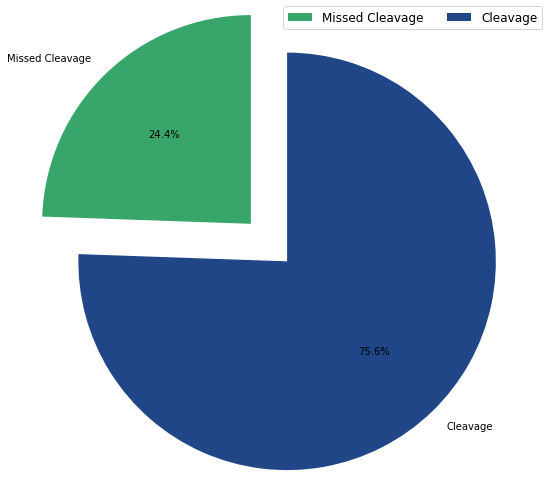

In [32]:
y_axis= np.array([p_count, total]) #create array of y axis values
mycolors = ["#38a66a","#204687"] #create array of colors
plt.figure(figsize=(8, 8)) #set figure size
plt.pie(y_axis, labels=["Missed Cleavage", "Cleavage"], autopct='%1.1f%%' , colors=mycolors, startangle=90, explode=[0.3, 0], radius=1.2,) #plot pie chart
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1), fontsize=12, ncol=2) #set legend      
plt.show() #show plot

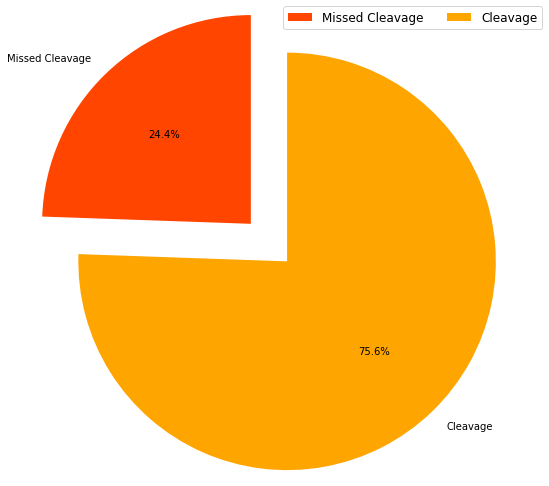

In [33]:
y_axis = np.array([p_count, total])
mycolors = ['#FF4500', '#FFA500']  # Custom color palette

plt.figure(figsize=(8, 8))
plt.pie(y_axis, labels=["Missed Cleavage", "Cleavage"], autopct='%1.1f%%', colors=mycolors, startangle=90, explode=[0.3, 0], radius=1.2)
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1), fontsize=12, ncol=2)
plt.show()

In [34]:
df['cleavage_sites'] = df['Sequence'].str.findall(r".(?:(?<![KR](?!P)).)*") #find all cleavage sites in peptide sequence
df['cleavage_sites'] = [','.join(map(str, l)) for l in df['cleavage_sites']] #convert list to string
df['missed'] = df.cleavage_sites.str.count(',') #count number of missed cleavage sites
df

,Sequence,Proteins,Modifications,Entry,Identifier,Protein_Sequence,Check,start,end,last_AA,next_AA,extended_peptide,cleavage_sites,missed
0,AAAAAAAAAAAAAAAGAGAGAK,SLC12A2,Unmodified,P55011,P55011,MEPRPTAPSSGAPGLAGVGETPSAAALAAARVELPGTAVPSVPEDA...,True,93,114,K,Q,KQ,AAAAAAAAAAAAAAAGAGAGAK,0
1,AAAAAAAAAAGAAGGR,PABPN1,Acetyl (Protein N-term),Q86U42,Q86U42,MAAAAAAAAAAGAAGGRGSGPGRRRHLVPGAGGEAGEGAPGGAGDY...,True,2,17,R,G,RG,AAAAAAAAAAGAAGGR,0
2,AAAAAAAAAAR,ARID1B,Unmodified,Q8NFD5,Q8NFD5,MAARAAAAAAAAAARARARAGSGERRAPPGPRPAPGARDLEAGARG...,True,5,15,R,A,RA,AAAAAAAAAAR,0
3,AAAAAAAGDSDSWDADAFSVEDPVRK,EIF3J,Acetyl (Protein N-term),O75822,O75822,MAAAAAAAGDSDSWDADAFSVEDPVRKVGGGGTAGGDRWEGEDEDE...,True,2,27,K,V,KV,"AAAAAAAGDSDSWDADAFSVEDPVR,K",1
4,AAAAAAALQAK,RPL4,Unmodified,P36578,P36578,MACARPLISVYSEKGESSGKNVTLPAVFKAPIRPDIVNFVHTNLRK...,True,354,364,K,S,KS,AAAAAAALQAK,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53210,YYTVFDRDNNR,CTSD,Unmodified,P07339,P07339,MQPSSLLPLALCLLAAPASALVRIPLHKFTSIRRTMSEVGGSVEDL...,True,393,403,R,V,RV,"YYTVFDR,DNNR",1
53211,YYVLNALK,PRPF8,Unmodified,Q6P2Q9,Q6P2Q9,MAGVFPYRGPGNPVPGPLAPLPDYMSEEKLQEKARKWQQLQAKRYA...,True,453,460,K,H,KH,YYVLNALK,0
53212,YYYAVYDMVVR,LAMB1,Unmodified,P07942,P07942,MGLLQLLAFSFLALCRARVRAQEPEFSYGCAEGSCYPATGDLLIGR...,True,258,268,R,G,RG,YYYAVYDMVVR,0
53213,YYYDGDMICK,GABPA,Unmodified,Q06546,Q06546,MTKREAEELIEIEIDGTEKAECTEESIVEQTYAPAECVSQAIDINE...,True,380,389,K,V,KV,YYYDGDMICK,0


In [35]:
cleavage= r".*?([RK]),.*"
second_cleavage= r".*[RK],.*([RK]),.*"
df['MS_AA']= df.cleavage_sites.str.findall(cleavage)
df['MS_AA']= df['MS_AA'].apply(list_to_string)
df['2nd_cleavage']= df.cleavage_sites.str.findall(second_cleavage)
df['2nd_cleavage']= df['2nd_cleavage'].apply(list_to_string)
df

,Sequence,Proteins,Modifications,Entry,Identifier,Protein_Sequence,Check,start,end,last_AA,next_AA,extended_peptide,cleavage_sites,missed,MS_AA,2nd_cleavage
0,AAAAAAAAAAAAAAAGAGAGAK,SLC12A2,Unmodified,P55011,P55011,MEPRPTAPSSGAPGLAGVGETPSAAALAAARVELPGTAVPSVPEDA...,True,93,114,K,Q,KQ,AAAAAAAAAAAAAAAGAGAGAK,0,,
1,AAAAAAAAAAGAAGGR,PABPN1,Acetyl (Protein N-term),Q86U42,Q86U42,MAAAAAAAAAAGAAGGRGSGPGRRRHLVPGAGGEAGEGAPGGAGDY...,True,2,17,R,G,RG,AAAAAAAAAAGAAGGR,0,,
2,AAAAAAAAAAR,ARID1B,Unmodified,Q8NFD5,Q8NFD5,MAARAAAAAAAAAARARARAGSGERRAPPGPRPAPGARDLEAGARG...,True,5,15,R,A,RA,AAAAAAAAAAR,0,,
3,AAAAAAAGDSDSWDADAFSVEDPVRK,EIF3J,Acetyl (Protein N-term),O75822,O75822,MAAAAAAAGDSDSWDADAFSVEDPVRKVGGGGTAGGDRWEGEDEDE...,True,2,27,K,V,KV,"AAAAAAAGDSDSWDADAFSVEDPVR,K",1,R,
4,AAAAAAALQAK,RPL4,Unmodified,P36578,P36578,MACARPLISVYSEKGESSGKNVTLPAVFKAPIRPDIVNFVHTNLRK...,True,354,364,K,S,KS,AAAAAAALQAK,0,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53210,YYTVFDRDNNR,CTSD,Unmodified,P07339,P07339,MQPSSLLPLALCLLAAPASALVRIPLHKFTSIRRTMSEVGGSVEDL...,True,393,403,R,V,RV,"YYTVFDR,DNNR",1,R,
53211,YYVLNALK,PRPF8,Unmodified,Q6P2Q9,Q6P2Q9,MAGVFPYRGPGNPVPGPLAPLPDYMSEEKLQEKARKWQQLQAKRYA...,True,453,460,K,H,KH,YYVLNALK,0,,
53212,YYYAVYDMVVR,LAMB1,Unmodified,P07942,P07942,MGLLQLLAFSFLALCRARVRAQEPEFSYGCAEGSCYPATGDLLIGR...,True,258,268,R,G,RG,YYYAVYDMVVR,0,,
53213,YYYDGDMICK,GABPA,Unmodified,Q06546,Q06546,MTKREAEELIEIEIDGTEKAECTEESIVEQTYAPAECVSQAIDINE...,True,380,389,K,V,KV,YYYDGDMICK,0,,


In [36]:
missed_cleavage= r".*?([RK]),.*"

In [37]:
def split_cleavage_sites(row):  #function to split  cleavage sites
    if row == 'nan':
        return row
    else:
        return row.split(',')

def second_split(cs_split): #function to seperate 2nd cleavage site
    if len(cs_split) >2:
        return cs_split[1]
    else:
        return ''

In [38]:
df['cs_split'] = df['cleavage_sites'].apply(split_cleavage_sites) #split cleavage sites
df['first_half']= df['cs_split'].apply(lambda x: x[0]) # first half of cleavage sites
df['second_half']= df['cs_split'].apply(second_split) #second half of cleavage sites
df


,Sequence,Proteins,Modifications,Entry,Identifier,Protein_Sequence,Check,start,end,last_AA,next_AA,extended_peptide,cleavage_sites,missed,MS_AA,2nd_cleavage,cs_split,first_half,second_half
0,AAAAAAAAAAAAAAAGAGAGAK,SLC12A2,Unmodified,P55011,P55011,MEPRPTAPSSGAPGLAGVGETPSAAALAAARVELPGTAVPSVPEDA...,True,93,114,K,Q,KQ,AAAAAAAAAAAAAAAGAGAGAK,0,,,[AAAAAAAAAAAAAAAGAGAGAK],AAAAAAAAAAAAAAAGAGAGAK,
1,AAAAAAAAAAGAAGGR,PABPN1,Acetyl (Protein N-term),Q86U42,Q86U42,MAAAAAAAAAAGAAGGRGSGPGRRRHLVPGAGGEAGEGAPGGAGDY...,True,2,17,R,G,RG,AAAAAAAAAAGAAGGR,0,,,[AAAAAAAAAAGAAGGR],AAAAAAAAAAGAAGGR,
2,AAAAAAAAAAR,ARID1B,Unmodified,Q8NFD5,Q8NFD5,MAARAAAAAAAAAARARARAGSGERRAPPGPRPAPGARDLEAGARG...,True,5,15,R,A,RA,AAAAAAAAAAR,0,,,[AAAAAAAAAAR],AAAAAAAAAAR,
3,AAAAAAAGDSDSWDADAFSVEDPVRK,EIF3J,Acetyl (Protein N-term),O75822,O75822,MAAAAAAAGDSDSWDADAFSVEDPVRKVGGGGTAGGDRWEGEDEDE...,True,2,27,K,V,KV,"AAAAAAAGDSDSWDADAFSVEDPVR,K",1,R,,"[AAAAAAAGDSDSWDADAFSVEDPVR, K]",AAAAAAAGDSDSWDADAFSVEDPVR,
4,AAAAAAALQAK,RPL4,Unmodified,P36578,P36578,MACARPLISVYSEKGESSGKNVTLPAVFKAPIRPDIVNFVHTNLRK...,True,354,364,K,S,KS,AAAAAAALQAK,0,,,[AAAAAAALQAK],AAAAAAALQAK,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53210,YYTVFDRDNNR,CTSD,Unmodified,P07339,P07339,MQPSSLLPLALCLLAAPASALVRIPLHKFTSIRRTMSEVGGSVEDL...,True,393,403,R,V,RV,"YYTVFDR,DNNR",1,R,,"[YYTVFDR, DNNR]",YYTVFDR,
53211,YYVLNALK,PRPF8,Unmodified,Q6P2Q9,Q6P2Q9,MAGVFPYRGPGNPVPGPLAPLPDYMSEEKLQEKARKWQQLQAKRYA...,True,453,460,K,H,KH,YYVLNALK,0,,,[YYVLNALK],YYVLNALK,
53212,YYYAVYDMVVR,LAMB1,Unmodified,P07942,P07942,MGLLQLLAFSFLALCRARVRAQEPEFSYGCAEGSCYPATGDLLIGR...,True,258,268,R,G,RG,YYYAVYDMVVR,0,,,[YYYAVYDMVVR],YYYAVYDMVVR,
53213,YYYDGDMICK,GABPA,Unmodified,Q06546,Q06546,MTKREAEELIEIEIDGTEKAECTEESIVEQTYAPAECVSQAIDINE...,True,380,389,K,V,KV,YYYDGDMICK,0,,,[YYYDGDMICK],YYYDGDMICK,


In [39]:
def cs_split(first_half, start, MS_AA):
    if MS_AA == '':
        return 0 
    else:
        return start + len(first_half)-1
        


def split_second(first_half, start, MS_AA):
    if MS_AA == '':
        return 0 
    else:
        return start + len(first_half)

In [40]:
df['position_MS']= df.apply(lambda row: cs_split(row['first_half'], row['start'], row['MS_AA']), axis=1)
df['2nd_MS'] = df.apply(lambda row: split_second(row['second_half'], row['position_MS'], row['2nd_cleavage']), axis=1)
df

,Sequence,Proteins,Modifications,Entry,Identifier,Protein_Sequence,Check,start,end,last_AA,...,extended_peptide,cleavage_sites,missed,MS_AA,2nd_cleavage,cs_split,first_half,second_half,position_MS,2nd_MS
0,AAAAAAAAAAAAAAAGAGAGAK,SLC12A2,Unmodified,P55011,P55011,MEPRPTAPSSGAPGLAGVGETPSAAALAAARVELPGTAVPSVPEDA...,True,93,114,K,...,KQ,AAAAAAAAAAAAAAAGAGAGAK,0,,,[AAAAAAAAAAAAAAAGAGAGAK],AAAAAAAAAAAAAAAGAGAGAK,,0,0
1,AAAAAAAAAAGAAGGR,PABPN1,Acetyl (Protein N-term),Q86U42,Q86U42,MAAAAAAAAAAGAAGGRGSGPGRRRHLVPGAGGEAGEGAPGGAGDY...,True,2,17,R,...,RG,AAAAAAAAAAGAAGGR,0,,,[AAAAAAAAAAGAAGGR],AAAAAAAAAAGAAGGR,,0,0
2,AAAAAAAAAAR,ARID1B,Unmodified,Q8NFD5,Q8NFD5,MAARAAAAAAAAAARARARAGSGERRAPPGPRPAPGARDLEAGARG...,True,5,15,R,...,RA,AAAAAAAAAAR,0,,,[AAAAAAAAAAR],AAAAAAAAAAR,,0,0
3,AAAAAAAGDSDSWDADAFSVEDPVRK,EIF3J,Acetyl (Protein N-term),O75822,O75822,MAAAAAAAGDSDSWDADAFSVEDPVRKVGGGGTAGGDRWEGEDEDE...,True,2,27,K,...,KV,"AAAAAAAGDSDSWDADAFSVEDPVR,K",1,R,,"[AAAAAAAGDSDSWDADAFSVEDPVR, K]",AAAAAAAGDSDSWDADAFSVEDPVR,,26,0
4,AAAAAAALQAK,RPL4,Unmodified,P36578,P36578,MACARPLISVYSEKGESSGKNVTLPAVFKAPIRPDIVNFVHTNLRK...,True,354,364,K,...,KS,AAAAAAALQAK,0,,,[AAAAAAALQAK],AAAAAAALQAK,,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53210,YYTVFDRDNNR,CTSD,Unmodified,P07339,P07339,MQPSSLLPLALCLLAAPASALVRIPLHKFTSIRRTMSEVGGSVEDL...,True,393,403,R,...,RV,"YYTVFDR,DNNR",1,R,,"[YYTVFDR, DNNR]",YYTVFDR,,399,0
53211,YYVLNALK,PRPF8,Unmodified,Q6P2Q9,Q6P2Q9,MAGVFPYRGPGNPVPGPLAPLPDYMSEEKLQEKARKWQQLQAKRYA...,True,453,460,K,...,KH,YYVLNALK,0,,,[YYVLNALK],YYVLNALK,,0,0
53212,YYYAVYDMVVR,LAMB1,Unmodified,P07942,P07942,MGLLQLLAFSFLALCRARVRAQEPEFSYGCAEGSCYPATGDLLIGR...,True,258,268,R,...,RG,YYYAVYDMVVR,0,,,[YYYAVYDMVVR],YYYAVYDMVVR,,0,0
53213,YYYDGDMICK,GABPA,Unmodified,Q06546,Q06546,MTKREAEELIEIEIDGTEKAECTEESIVEQTYAPAECVSQAIDINE...,True,380,389,K,...,KV,YYYDGDMICK,0,,,[YYYDGDMICK],YYYDGDMICK,,0,0


In [41]:
#test_df= test_df.rename({'position_MS':'dssp index'}, axis=1)
df= df.rename({'Entry':'ProteinID'}, axis=1)
df

,Sequence,Proteins,Modifications,ProteinID,Identifier,Protein_Sequence,Check,start,end,last_AA,...,extended_peptide,cleavage_sites,missed,MS_AA,2nd_cleavage,cs_split,first_half,second_half,position_MS,2nd_MS
0,AAAAAAAAAAAAAAAGAGAGAK,SLC12A2,Unmodified,P55011,P55011,MEPRPTAPSSGAPGLAGVGETPSAAALAAARVELPGTAVPSVPEDA...,True,93,114,K,...,KQ,AAAAAAAAAAAAAAAGAGAGAK,0,,,[AAAAAAAAAAAAAAAGAGAGAK],AAAAAAAAAAAAAAAGAGAGAK,,0,0
1,AAAAAAAAAAGAAGGR,PABPN1,Acetyl (Protein N-term),Q86U42,Q86U42,MAAAAAAAAAAGAAGGRGSGPGRRRHLVPGAGGEAGEGAPGGAGDY...,True,2,17,R,...,RG,AAAAAAAAAAGAAGGR,0,,,[AAAAAAAAAAGAAGGR],AAAAAAAAAAGAAGGR,,0,0
2,AAAAAAAAAAR,ARID1B,Unmodified,Q8NFD5,Q8NFD5,MAARAAAAAAAAAARARARAGSGERRAPPGPRPAPGARDLEAGARG...,True,5,15,R,...,RA,AAAAAAAAAAR,0,,,[AAAAAAAAAAR],AAAAAAAAAAR,,0,0
3,AAAAAAAGDSDSWDADAFSVEDPVRK,EIF3J,Acetyl (Protein N-term),O75822,O75822,MAAAAAAAGDSDSWDADAFSVEDPVRKVGGGGTAGGDRWEGEDEDE...,True,2,27,K,...,KV,"AAAAAAAGDSDSWDADAFSVEDPVR,K",1,R,,"[AAAAAAAGDSDSWDADAFSVEDPVR, K]",AAAAAAAGDSDSWDADAFSVEDPVR,,26,0
4,AAAAAAALQAK,RPL4,Unmodified,P36578,P36578,MACARPLISVYSEKGESSGKNVTLPAVFKAPIRPDIVNFVHTNLRK...,True,354,364,K,...,KS,AAAAAAALQAK,0,,,[AAAAAAALQAK],AAAAAAALQAK,,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53210,YYTVFDRDNNR,CTSD,Unmodified,P07339,P07339,MQPSSLLPLALCLLAAPASALVRIPLHKFTSIRRTMSEVGGSVEDL...,True,393,403,R,...,RV,"YYTVFDR,DNNR",1,R,,"[YYTVFDR, DNNR]",YYTVFDR,,399,0
53211,YYVLNALK,PRPF8,Unmodified,Q6P2Q9,Q6P2Q9,MAGVFPYRGPGNPVPGPLAPLPDYMSEEKLQEKARKWQQLQAKRYA...,True,453,460,K,...,KH,YYVLNALK,0,,,[YYVLNALK],YYVLNALK,,0,0
53212,YYYAVYDMVVR,LAMB1,Unmodified,P07942,P07942,MGLLQLLAFSFLALCRARVRAQEPEFSYGCAEGSCYPATGDLLIGR...,True,258,268,R,...,RG,YYYAVYDMVVR,0,,,[YYYAVYDMVVR],YYYAVYDMVVR,,0,0
53213,YYYDGDMICK,GABPA,Unmodified,Q06546,Q06546,MTKREAEELIEIEIDGTEKAECTEESIVEQTYAPAECVSQAIDINE...,True,380,389,K,...,KV,YYYDGDMICK,0,,,[YYYDGDMICK],YYYDGDMICK,,0,0


In [42]:
df.to_csv('newDF_A2.csv', index = False, header=True) #write to csv file

In [43]:
#df= df.filter(['Sequence', 'Protein_Sequence', 'Proteins', 'ProteinID', 'start', 'end', 'cleavage_sites', 'missed', 'MS_AA', '2nd_cleavage'  ,'position_MS', '2nd_MS'], axis=1)

In [44]:
df.to_csv('MS_df_A2.csv', index = False, header=True) #write to csv file

In [45]:
df_model= df.filter(['Protein_Sequence', 'Proteins', 'ProteinID', 'start', 'end', 'cleavage_sites', 'MS_AA','position_MS','next_AA'], axis=1)
df_model

,Protein_Sequence,Proteins,ProteinID,start,end,cleavage_sites,MS_AA,position_MS,next_AA
0,MEPRPTAPSSGAPGLAGVGETPSAAALAAARVELPGTAVPSVPEDA...,SLC12A2,P55011,93,114,AAAAAAAAAAAAAAAGAGAGAK,,0,Q
1,MAAAAAAAAAAGAAGGRGSGPGRRRHLVPGAGGEAGEGAPGGAGDY...,PABPN1,Q86U42,2,17,AAAAAAAAAAGAAGGR,,0,G
2,MAARAAAAAAAAAARARARAGSGERRAPPGPRPAPGARDLEAGARG...,ARID1B,Q8NFD5,5,15,AAAAAAAAAAR,,0,A
3,MAAAAAAAGDSDSWDADAFSVEDPVRKVGGGGTAGGDRWEGEDEDE...,EIF3J,O75822,2,27,"AAAAAAAGDSDSWDADAFSVEDPVR,K",R,26,V
4,MACARPLISVYSEKGESSGKNVTLPAVFKAPIRPDIVNFVHTNLRK...,RPL4,P36578,354,364,AAAAAAALQAK,,0,S
...,...,...,...,...,...,...,...,...,...
53210,MQPSSLLPLALCLLAAPASALVRIPLHKFTSIRRTMSEVGGSVEDL...,CTSD,P07339,393,403,"YYTVFDR,DNNR",R,399,V
53211,MAGVFPYRGPGNPVPGPLAPLPDYMSEEKLQEKARKWQQLQAKRYA...,PRPF8,Q6P2Q9,453,460,YYVLNALK,,0,H
53212,MGLLQLLAFSFLALCRARVRAQEPEFSYGCAEGSCYPATGDLLIGR...,LAMB1,P07942,258,268,YYYAVYDMVVR,,0,G
53213,MTKREAEELIEIEIDGTEKAECTEESIVEQTYAPAECVSQAIDINE...,GABPA,Q06546,380,389,YYYDGDMICK,,0,V


In [46]:
df_model= df_model.rename({'position_MS':'MC_position', 'MS_AA':'Missed_Cleavage_AA'}, axis=1)
df_model.to_csv('MS_model.csv', index = False, header=True) #write to csv file
df_model

,Protein_Sequence,Proteins,ProteinID,start,end,cleavage_sites,Missed_Cleavage_AA,MC_position,next_AA
0,MEPRPTAPSSGAPGLAGVGETPSAAALAAARVELPGTAVPSVPEDA...,SLC12A2,P55011,93,114,AAAAAAAAAAAAAAAGAGAGAK,,0,Q
1,MAAAAAAAAAAGAAGGRGSGPGRRRHLVPGAGGEAGEGAPGGAGDY...,PABPN1,Q86U42,2,17,AAAAAAAAAAGAAGGR,,0,G
2,MAARAAAAAAAAAARARARAGSGERRAPPGPRPAPGARDLEAGARG...,ARID1B,Q8NFD5,5,15,AAAAAAAAAAR,,0,A
3,MAAAAAAAGDSDSWDADAFSVEDPVRKVGGGGTAGGDRWEGEDEDE...,EIF3J,O75822,2,27,"AAAAAAAGDSDSWDADAFSVEDPVR,K",R,26,V
4,MACARPLISVYSEKGESSGKNVTLPAVFKAPIRPDIVNFVHTNLRK...,RPL4,P36578,354,364,AAAAAAALQAK,,0,S
...,...,...,...,...,...,...,...,...,...
53210,MQPSSLLPLALCLLAAPASALVRIPLHKFTSIRRTMSEVGGSVEDL...,CTSD,P07339,393,403,"YYTVFDR,DNNR",R,399,V
53211,MAGVFPYRGPGNPVPGPLAPLPDYMSEEKLQEKARKWQQLQAKRYA...,PRPF8,Q6P2Q9,453,460,YYVLNALK,,0,H
53212,MGLLQLLAFSFLALCRARVRAQEPEFSYGCAEGSCYPATGDLLIGR...,LAMB1,P07942,258,268,YYYAVYDMVVR,,0,G
53213,MTKREAEELIEIEIDGTEKAECTEESIVEQTYAPAECVSQAIDINE...,GABPA,Q06546,380,389,YYYDGDMICK,,0,V


In [47]:
df = df.filter(['Sequence', 'ProteinID','Modifications', 'start', 'end', 'cleavage_sites','MS_AA','position_MS', 'missed'])
df

,Sequence,ProteinID,Modifications,start,end,cleavage_sites,MS_AA,position_MS,missed
0,AAAAAAAAAAAAAAAGAGAGAK,P55011,Unmodified,93,114,AAAAAAAAAAAAAAAGAGAGAK,,0,0
1,AAAAAAAAAAGAAGGR,Q86U42,Acetyl (Protein N-term),2,17,AAAAAAAAAAGAAGGR,,0,0
2,AAAAAAAAAAR,Q8NFD5,Unmodified,5,15,AAAAAAAAAAR,,0,0
3,AAAAAAAGDSDSWDADAFSVEDPVRK,O75822,Acetyl (Protein N-term),2,27,"AAAAAAAGDSDSWDADAFSVEDPVR,K",R,26,1
4,AAAAAAALQAK,P36578,Unmodified,354,364,AAAAAAALQAK,,0,0
...,...,...,...,...,...,...,...,...,...
53210,YYTVFDRDNNR,P07339,Unmodified,393,403,"YYTVFDR,DNNR",R,399,1
53211,YYVLNALK,Q6P2Q9,Unmodified,453,460,YYVLNALK,,0,0
53212,YYYAVYDMVVR,P07942,Unmodified,258,268,YYYAVYDMVVR,,0,0
53213,YYYDGDMICK,Q06546,Unmodified,380,389,YYYDGDMICK,,0,0


In [48]:
df.cleavage_sites = df.cleavage_sites.str.split(',')                                                                
df= df.explode('cleavage_sites')

In [49]:
def fill_empty_MS_AA(row):
    if row['MS_AA'] == '':
        last_amino_acid = row['Sequence'][-1]
        return last_amino_acid
    else:
        return row['MS_AA']

In [50]:
df['MS_AA'] = df.apply(lambda row: fill_empty_MS_AA(row), axis=1)
df

,Sequence,ProteinID,Modifications,start,end,cleavage_sites,MS_AA,position_MS,missed
0,AAAAAAAAAAAAAAAGAGAGAK,P55011,Unmodified,93,114,AAAAAAAAAAAAAAAGAGAGAK,K,0,0
1,AAAAAAAAAAGAAGGR,Q86U42,Acetyl (Protein N-term),2,17,AAAAAAAAAAGAAGGR,R,0,0
2,AAAAAAAAAAR,Q8NFD5,Unmodified,5,15,AAAAAAAAAAR,R,0,0
3,AAAAAAAGDSDSWDADAFSVEDPVRK,O75822,Acetyl (Protein N-term),2,27,AAAAAAAGDSDSWDADAFSVEDPVR,R,26,1
3,AAAAAAAGDSDSWDADAFSVEDPVRK,O75822,Acetyl (Protein N-term),2,27,K,R,26,1
...,...,...,...,...,...,...,...,...,...
53210,YYTVFDRDNNR,P07339,Unmodified,393,403,DNNR,R,399,1
53211,YYVLNALK,Q6P2Q9,Unmodified,453,460,YYVLNALK,K,0,0
53212,YYYAVYDMVVR,P07942,Unmodified,258,268,YYYAVYDMVVR,R,0,0
53213,YYYDGDMICK,Q06546,Unmodified,380,389,YYYDGDMICK,K,0,0


In [51]:
df = df[df.missed != 2]
df

,Sequence,ProteinID,Modifications,start,end,cleavage_sites,MS_AA,position_MS,missed
0,AAAAAAAAAAAAAAAGAGAGAK,P55011,Unmodified,93,114,AAAAAAAAAAAAAAAGAGAGAK,K,0,0
1,AAAAAAAAAAGAAGGR,Q86U42,Acetyl (Protein N-term),2,17,AAAAAAAAAAGAAGGR,R,0,0
2,AAAAAAAAAAR,Q8NFD5,Unmodified,5,15,AAAAAAAAAAR,R,0,0
3,AAAAAAAGDSDSWDADAFSVEDPVRK,O75822,Acetyl (Protein N-term),2,27,AAAAAAAGDSDSWDADAFSVEDPVR,R,26,1
3,AAAAAAAGDSDSWDADAFSVEDPVRK,O75822,Acetyl (Protein N-term),2,27,K,R,26,1
...,...,...,...,...,...,...,...,...,...
53210,YYTVFDRDNNR,P07339,Unmodified,393,403,DNNR,R,399,1
53211,YYVLNALK,Q6P2Q9,Unmodified,453,460,YYVLNALK,K,0,0
53212,YYYAVYDMVVR,P07942,Unmodified,258,268,YYYAVYDMVVR,R,0,0
53213,YYYDGDMICK,Q06546,Unmodified,380,389,YYYDGDMICK,K,0,0


In [52]:
df['ProteinID_s'] = df['ProteinID'].shift(1)
df['start_s'] = df['start'].shift(1)
df['end_s'] = df['end'].shift(1)

In [53]:
df['duplicate'] = (df['ProteinID'] == df['ProteinID_s']) & (df['start'] == df['start_s']) & (df['end'] == df['end_s'])

In [54]:
def change_values(row): #function to change values
    if row['duplicate'] == True:
        row['missed'] = 0
        row['MS_AA'] = row['Sequence'][-1]
        row['position_MS'] = row['end']
        return row
    else:
        return row
        
def fill_empty_position_MS(row): #function to fill empty position_MS
    if row['position_MS'] == 0:
        row['position_MS'] = row['end']
        return row
    else:
        return row 

In [55]:
df = df.apply(lambda row: change_values(row), axis=1) #apply function to change values
df = df.apply(lambda row: fill_empty_position_MS(row), axis=1)
df

,Sequence,ProteinID,Modifications,start,end,cleavage_sites,MS_AA,position_MS,missed,ProteinID_s,start_s,end_s,duplicate
0,AAAAAAAAAAAAAAAGAGAGAK,P55011,Unmodified,93,114,AAAAAAAAAAAAAAAGAGAGAK,K,114,0,NaN,NaN,NaN,False
1,AAAAAAAAAAGAAGGR,Q86U42,Acetyl (Protein N-term),2,17,AAAAAAAAAAGAAGGR,R,17,0,P55011,93.0,114.0,False
2,AAAAAAAAAAR,Q8NFD5,Unmodified,5,15,AAAAAAAAAAR,R,15,0,Q86U42,2.0,17.0,False
3,AAAAAAAGDSDSWDADAFSVEDPVRK,O75822,Acetyl (Protein N-term),2,27,AAAAAAAGDSDSWDADAFSVEDPVR,R,26,1,Q8NFD5,5.0,15.0,False
3,AAAAAAAGDSDSWDADAFSVEDPVRK,O75822,Acetyl (Protein N-term),2,27,K,K,27,0,O75822,2.0,27.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
53210,YYTVFDRDNNR,P07339,Unmodified,393,403,DNNR,R,403,0,P07339,393.0,403.0,True
53211,YYVLNALK,Q6P2Q9,Unmodified,453,460,YYVLNALK,K,460,0,P07339,393.0,403.0,False
53212,YYYAVYDMVVR,P07942,Unmodified,258,268,YYYAVYDMVVR,R,268,0,Q6P2Q9,453.0,460.0,False
53213,YYYDGDMICK,Q06546,Unmodified,380,389,YYYDGDMICK,K,389,0,P07942,258.0,268.0,False


In [56]:
df= df.rename({'MS_AA':'Last_AA', 'missed':'Cleavage', 'position_MS':'LastAA_position' }, axis=1)
df

,Sequence,ProteinID,Modifications,start,end,cleavage_sites,Last_AA,LastAA_position,Cleavage,ProteinID_s,start_s,end_s,duplicate
0,AAAAAAAAAAAAAAAGAGAGAK,P55011,Unmodified,93,114,AAAAAAAAAAAAAAAGAGAGAK,K,114,0,NaN,NaN,NaN,False
1,AAAAAAAAAAGAAGGR,Q86U42,Acetyl (Protein N-term),2,17,AAAAAAAAAAGAAGGR,R,17,0,P55011,93.0,114.0,False
2,AAAAAAAAAAR,Q8NFD5,Unmodified,5,15,AAAAAAAAAAR,R,15,0,Q86U42,2.0,17.0,False
3,AAAAAAAGDSDSWDADAFSVEDPVRK,O75822,Acetyl (Protein N-term),2,27,AAAAAAAGDSDSWDADAFSVEDPVR,R,26,1,Q8NFD5,5.0,15.0,False
3,AAAAAAAGDSDSWDADAFSVEDPVRK,O75822,Acetyl (Protein N-term),2,27,K,K,27,0,O75822,2.0,27.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
53210,YYTVFDRDNNR,P07339,Unmodified,393,403,DNNR,R,403,0,P07339,393.0,403.0,True
53211,YYVLNALK,Q6P2Q9,Unmodified,453,460,YYVLNALK,K,460,0,P07339,393.0,403.0,False
53212,YYYAVYDMVVR,P07942,Unmodified,258,268,YYYAVYDMVVR,R,268,0,Q6P2Q9,453.0,460.0,False
53213,YYYDGDMICK,Q06546,Unmodified,380,389,YYYDGDMICK,K,389,0,P07942,258.0,268.0,False


In [57]:
df = df.filter(['Sequence', 'ProteinID','Modifications', 'start', 'end', 'cleavage_sites','Last_AA','LastAA_position', 'Cleavage'])
df

,Sequence,ProteinID,Modifications,start,end,cleavage_sites,Last_AA,LastAA_position,Cleavage
0,AAAAAAAAAAAAAAAGAGAGAK,P55011,Unmodified,93,114,AAAAAAAAAAAAAAAGAGAGAK,K,114,0
1,AAAAAAAAAAGAAGGR,Q86U42,Acetyl (Protein N-term),2,17,AAAAAAAAAAGAAGGR,R,17,0
2,AAAAAAAAAAR,Q8NFD5,Unmodified,5,15,AAAAAAAAAAR,R,15,0
3,AAAAAAAGDSDSWDADAFSVEDPVRK,O75822,Acetyl (Protein N-term),2,27,AAAAAAAGDSDSWDADAFSVEDPVR,R,26,1
3,AAAAAAAGDSDSWDADAFSVEDPVRK,O75822,Acetyl (Protein N-term),2,27,K,K,27,0
...,...,...,...,...,...,...,...,...,...
53210,YYTVFDRDNNR,P07339,Unmodified,393,403,DNNR,R,403,0
53211,YYVLNALK,Q6P2Q9,Unmodified,453,460,YYVLNALK,K,460,0
53212,YYYAVYDMVVR,P07942,Unmodified,258,268,YYYAVYDMVVR,R,268,0
53213,YYYDGDMICK,Q06546,Unmodified,380,389,YYYDGDMICK,K,389,0


In [58]:
df.to_csv('MS_df_A2.csv', index = False, header=True) #write to csv file

In [59]:
df

,Sequence,ProteinID,Modifications,start,end,cleavage_sites,Last_AA,LastAA_position,Cleavage
0,AAAAAAAAAAAAAAAGAGAGAK,P55011,Unmodified,93,114,AAAAAAAAAAAAAAAGAGAGAK,K,114,0
1,AAAAAAAAAAGAAGGR,Q86U42,Acetyl (Protein N-term),2,17,AAAAAAAAAAGAAGGR,R,17,0
2,AAAAAAAAAAR,Q8NFD5,Unmodified,5,15,AAAAAAAAAAR,R,15,0
3,AAAAAAAGDSDSWDADAFSVEDPVRK,O75822,Acetyl (Protein N-term),2,27,AAAAAAAGDSDSWDADAFSVEDPVR,R,26,1
3,AAAAAAAGDSDSWDADAFSVEDPVRK,O75822,Acetyl (Protein N-term),2,27,K,K,27,0
...,...,...,...,...,...,...,...,...,...
53210,YYTVFDRDNNR,P07339,Unmodified,393,403,DNNR,R,403,0
53211,YYVLNALK,Q6P2Q9,Unmodified,453,460,YYVLNALK,K,460,0
53212,YYYAVYDMVVR,P07942,Unmodified,258,268,YYYAVYDMVVR,R,268,0
53213,YYYDGDMICK,Q06546,Unmodified,380,389,YYYDGDMICK,K,389,0


In [ ]:
protein_name=input("input protein name:")

result = df.loc[df["ProteinID"] == protein_name]


if protein_name=='None':
     print(df)
else:
    print (result)

### Feature calculation 2nd attempt ###

In [60]:
from pylab import *
from Bio import SeqIO
import matplotlib.pyplot as plt
import seaborn as sns 
from Bio.PDB import PDBParser
from Bio.PDB.DSSP import DSSP
import pandas as pd
import os
import re
import gzip
import shutil
import glob
import numpy as np
import scipy.stats as stats
import pylab as pl
import csv
from Bio.PDB.SASA import ShrakeRupley


In [61]:
import Peptide_Analysis as PA# has to be in the same directory

In [62]:
df = pd.read_csv("C:\\Users\\ahmad\\Dropbox\\PC\\Documents\\QMUL\\Research Project\\Proteomics\\Proteomics-extended\\MS_df_A2.csv")   # read in the dataframe
df.fillna('', inplace=True)   # replace NaN with empty string

In [63]:
def dssp_file_df(file): # function to read in the dssp file and return a dataframe
    p = PDBParser() # create a PDB parser
    structure = p.get_structure(f"{file}", file) # get the structure from the PDB file
    model = structure[0]#  get the first model from the structure
    dssp = DSSP(model, file) # get the DSSP from the model
    df= pd.DataFrame(dssp)# create a dataframe from the DSSP
    df.columns = ["dssp index", "amino acid", "secondary structure", "relative ASA", "phi", "psi", "NH01R", "NH01E", "ONH1", "ONHE", "NH2R",
    "NO2E", "ONH2R", "ONH2E"] # naming the columns
    return df # return the dataframe

In [64]:
# def dssp_dataframe_calculation(df):
#     df.fillna('', inplace=True)# Replace all NaN values in the DataFrame with empty strings
#     output_rows = [] # Create an empty list to store the output rows
#     # Define the path to the proteome directory
#     proteome_path = 'C:\\Users\\ahmad\\Dropbox\\PC\\Documents\\QMUL\\Research Project\\Proteomics\\Proteomics-extended\\data\\proteome' 
    
#     # Iterate over each row of the input DataFrame
#     for i, j in df.iterrows():
#         # Generate the file path for the DSSP file for the current protein
#         filename = f'AF-{j["ProteinID"]}-F1-model_v4.pdb'
#         filepath = os.path.join(proteome_path, filename, filename)
        
#         # Check if the DSSP file exists
#         if os.path.exists(filepath):
#             # If it does, read the DSSP file into a DataFrame
#             df_dssp = dssp_file_df(filepath)
#             # Find the row in the DSSP DataFrame that corresponds to the last amino acid in the protein sequence
#             dssp_row = df_dssp[df_dssp['dssp index'] == j['LastAA_position']]
#             # If a matching row was found, append the values to the output rows list
#             if not dssp_row.empty:
#                 output_rows.append([
#                     dssp_row['relative ASA'].values[0],
#                     dssp_row['secondary structure'].values[0],
#                     dssp_row['phi'].values[0],
#                     dssp_row['psi'].values[0],
#                     dssp_row['NH01R'].values[0],
#                     dssp_row['NH01E'].values[0],
#                     dssp_row['ONH1'].values[0],
#                     dssp_row['ONHE'].values[0],
#                     dssp_row['NH2R'].values[0],
#                     dssp_row['NO2E'].values[0],
#                     dssp_row['ONH2R'].values[0],
#                     dssp_row['ONH2E'].values[0],
#                 ])
#             else: # If no matching row was found, append 12 empty strings to the output rows list
#                 output_rows.append(('' for _ in range(12)))
#         else:# If the DSSP file does not exist, append 12 empty strings to the output rows list
#             output_rows.append(('' for _ in range(12)))
#     # Write the output rows list to a CSV file named 'output.csv'
#     print(len(output_rows))
#     with open('output2.csv', 'w', newline='') as f:
#         writer = csv.writer(f)
#         writer.writerow(['relative ASA', 'secondary_structure', 'phi', 'psi', 'NH01R', 'NH01E', 'ONH1', 'ONHE', 'NH2R', 'NO2E', 'ONH2R', 'ONH2E'])
#         writer.writerows(output_rows)
#     # Read the 'output.csv' file into a DataFrame
#     dataframe = pd.read_csv("C:\\Users\\ahmad\\Dropbox\\PC\\Documents\\QMUL\\Research Project\\Proteomics\\Proteomics-extended\\output2.csv")
#     df = df.join(dataframe)# Join the input DataFrame with the output DataFrame 
#     df['relative ASA'].replace('', np.nan, inplace=True) 
#     df.dropna(subset=['relative ASA'], inplace=True)
#     return df

In [65]:
# dssp_dataframe_calculation(df)

In [66]:
def dssp_df_calcualtion(df): # function to calculate the secondary structure and relative ASA
    relative_asa = [] # create a list to store the relative ASA
    secondary_structure = []    # create a list to store the secondary structure
    phi = []    # create a list to store the phi
    psi = []    # create a list to store the psi
    NH01R = []  # create a list to store the NH01R
    NH01E = []  # create a list to store the NH01E
    ONH1 = []   # create a list to store the ONH1
    ONHE = []   # create a list to store the ONHE
    NH2R = []   # create a list to store the NH2R
    NO2E = []   # create a list to store the NO2E
    ONH2R = []  # create a list to store the ONH2R
    ONH2E = []  # create a list to store the ONH2E



    for i,j in df.iterrows():   # loop through the dataframe
        filename= f'AF-{j["ProteinID"]}-F1-model_v4.pdb' # create the filename
        if filename in os.listdir("C:\\Users\\ahmad\\Dropbox\\PC\\Documents\\QMUL\\Research Project\\Proteomics\\Proteomics-extended\\data\\proteome"):   # if the filename is in the human proteome folder
            print(filename)

            df_dssp= dssp_file_df(f'C:\\Users\\ahmad\\Dropbox\\PC\\Documents\\QMUL\\Research Project\\Proteomics\\Proteomics-extended\\data\\proteome\\{filename}\\{filename}') # read in the dssp file
            if j['LastAA_position'] in df_dssp['dssp index']: # if the last AA position is in the dssp file
                relative_asa.append(df_dssp[df_dssp['dssp index'] == j['LastAA_position']]['relative ASA'].values[0]) # append the relative ASA
                secondary_structure.append(df_dssp[df_dssp['dssp index'] == j['LastAA_position']]['secondary structure'].values[0]) # append the secondary structure
                phi.append(df_dssp[df_dssp['dssp index'] == j['LastAA_position']]['phi'].values[0]) # append the phi
                psi.append(df_dssp[df_dssp['dssp index'] == j['LastAA_position']]['psi'].values[0]) # append the psi
                NH01R.append(df_dssp[df_dssp['dssp index'] == j['LastAA_position']]['NH01R'].values[0]) # append the NH01R
                NH01E.append(df_dssp[df_dssp['dssp index'] == j['LastAA_position']]['NH01E'].values[0]) # append the NH01E
                ONH1.append(df_dssp[df_dssp['dssp index'] == j['LastAA_position']]['ONH1'].values[0])   # append the ONH1
                ONHE.append(df_dssp[df_dssp['dssp index'] == j['LastAA_position']]['ONHE'].values[0])   # append the ONHE
                NH2R.append(df_dssp[df_dssp['dssp index'] == j['LastAA_position']]['NH2R'].values[0])   # append the NH2R
                NO2E.append(df_dssp[df_dssp['dssp index'] == j['LastAA_position']]['NO2E'].values[0])   # append the NO2E
                ONH2R.append(df_dssp[df_dssp['dssp index'] == j['LastAA_position']]['ONH2R'].values[0]) # append the ONH2R
                ONH2E.append(df_dssp[df_dssp['dssp index'] == j['LastAA_position']]['ONH2E'].values[0]) # append the ONH2E


            else: # if the last AA position is not in the dssp file
                relative_asa.append('') # append empty string
                secondary_structure.append('')
                phi.append('')
                psi.append('')
                NH01R.append('')
                NH01E.append('')
                ONH1.append('')
                ONHE.append('')
                NH2R.append('')
                NO2E.append('')
                ONH2R.append('')
                ONH2E.append('')
        else:   # if the filename is not in the human proteome folder
            relative_asa.append('') # append empty string
            secondary_structure.append('')  
            phi.append('')
            psi.append('')
            NH01R.append('')
            NH01E.append('')
            ONH1.append('')
            ONHE.append('')
            NH2R.append('')
            NO2E.append('')
            ONH2R.append('')
            ONH2E.append('')


    df['secondary_structure'] = secondary_structure # add the secondary structure to the dataframe
    df['relative ASA'] = relative_asa
    df['phi'] = phi
    df['psi'] = psi
    df['NH01R'] = NH01R
    df['NH01E'] = NH01E
    df['ONH1'] = ONH1
    df['ONHE'] = ONHE
    df['NH2R'] = NH2R
    df['NO2E'] = NO2E
    df['ONH2R'] = ONH2R
    df['ONH2E'] = ONH2E
    return df.to_csv('df_dssp_A2.csv', index=False)   # return the dataframe to a csv file

In [67]:
#dssp_df_calcualtion(df)

In [68]:
df=pd.read_csv("C:\\Users\\ahmad\\Dropbox\\PC\\Documents\\QMUL\\Research Project\\Proteomics\\Proteomics-extended\\df_dssp_A2.csv")
#df = df.join(dataframe)# Join the input DataFrame with the output DataFrame 
df['relative ASA'].replace('', np.nan, inplace=True)
df.dropna(subset=['relative ASA'], inplace=True)


In [69]:
ss= pd.get_dummies(df.secondary_structure)
df= pd.concat([df, ss], axis=1)

In [70]:
mod= pd.get_dummies(df.Modifications)
df= pd.concat([df, mod], axis=1)

In [71]:
df_cleavage= df.loc[df['Cleavage'] == 0]
df_cleavage

,Sequence,ProteinID,Modifications,start,end,cleavage_sites,Last_AA,LastAA_position,Cleavage,secondary_structure,...,-,B,E,G,H,I,S,T,Acetyl (Protein N-term),Unmodified
0,AAAAAAAAAAAAAAAGAGAGAK,P55011,Unmodified,93,114,AAAAAAAAAAAAAAAGAGAGAK,K,114,0,-,...,1,0,0,0,0,0,0,0,0,1
1,AAAAAAAAAAGAAGGR,Q86U42,Acetyl (Protein N-term),2,17,AAAAAAAAAAGAAGGR,R,17,0,-,...,1,0,0,0,0,0,0,0,1,0
2,AAAAAAAAAAR,Q8NFD5,Unmodified,5,15,AAAAAAAAAAR,R,15,0,-,...,1,0,0,0,0,0,0,0,0,1
4,AAAAAAAGDSDSWDADAFSVEDPVRK,O75822,Acetyl (Protein N-term),2,27,K,K,27,0,-,...,1,0,0,0,0,0,0,0,1,0
5,AAAAAAALQAK,P36578,Unmodified,354,364,AAAAAAALQAK,K,364,0,H,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57047,YYTVFDRDNNR,P07339,Unmodified,393,403,DNNR,R,403,0,E,...,0,0,1,0,0,0,0,0,0,1
57048,YYVLNALK,Q6P2Q9,Unmodified,453,460,YYVLNALK,K,460,0,T,...,0,0,0,0,0,0,0,1,0,1
57049,YYYAVYDMVVR,P07942,Unmodified,258,268,YYYAVYDMVVR,R,268,0,E,...,0,0,1,0,0,0,0,0,0,1
57050,YYYDGDMICK,Q06546,Unmodified,380,389,YYYDGDMICK,K,389,0,E,...,0,0,1,0,0,0,0,0,0,1


In [72]:
df_miss_cleavage= df.loc[df['Cleavage'] == 1]
df_miss_cleavage

,Sequence,ProteinID,Modifications,start,end,cleavage_sites,Last_AA,LastAA_position,Cleavage,secondary_structure,...,-,B,E,G,H,I,S,T,Acetyl (Protein N-term),Unmodified
3,AAAAAAAGDSDSWDADAFSVEDPVRK,O75822,Acetyl (Protein N-term),2,27,AAAAAAAGDSDSWDADAFSVEDPVR,R,26,1,-,...,1,0,0,0,0,0,0,0,1,0
8,AAAAAAGSGTPREEEGPAGEAAASQPQAPTSVPGAR,Q9NR33,Acetyl (Protein N-term),2,37,AAAAAAGSGTPR,R,13,1,-,...,1,0,0,0,0,0,0,0,1,0
29,AAADGDDSLYPIAVLIDELRNEDVQLR,P30153,Acetyl (Protein N-term),2,28,AAADGDDSLYPIAVLIDELR,R,21,1,T,...,0,0,0,0,0,0,0,1,1,0
50,AAALEFLNRFEEAK,P31948,Unmodified,79,92,AAALEFLNR,R,87,1,-,...,1,0,0,0,0,0,0,0,0,1
56,AAAMDVDTPSGTNSGAGKK,P62877,Acetyl (Protein N-term),2,20,AAAMDVDTPSGTNSGAGK,K,19,1,-,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57018,YYMNQVEETRYCVDQNLLK,P52888,Unmodified,339,357,YYMNQVEETR,R,348,1,H,...,0,0,0,0,1,0,0,0,0,1
57026,YYPTEDVPRK,Q02878,Unmodified,115,124,YYPTEDVPR,R,123,1,-,...,1,0,0,0,0,0,0,0,0,1
57030,YYQLFLDSLRDPNK,Q96EK5,Unmodified,516,529,YYQLFLDSLR,R,525,1,S,...,0,0,0,0,0,0,1,0,0,1
57033,YYREVLPGEIVEISR,Q06203,Unmodified,246,260,YYR,R,248,1,E,...,0,0,1,0,0,0,0,0,0,1


In [73]:
df_cleavage = df_cleavage[df_cleavage['relative ASA'] != '']
df_miss_cleavage = df_miss_cleavage[df_miss_cleavage['relative ASA'] != '']

In [74]:
Cleavage= []
for i in df_cleavage['relative ASA']:
    Cleavage.append(i)


h= sorted(Cleavage)

Miss_cleavage= []
for j in df_miss_cleavage['relative ASA']:
    Miss_cleavage.append(j)


k= sorted(Miss_cleavage)

In [75]:
print(len(Cleavage))
print(len(Miss_cleavage))

49535
6048


In [76]:
df['Last_AA'].value_counts()

K    28688
R    26895
Name: Last_AA, dtype: int64

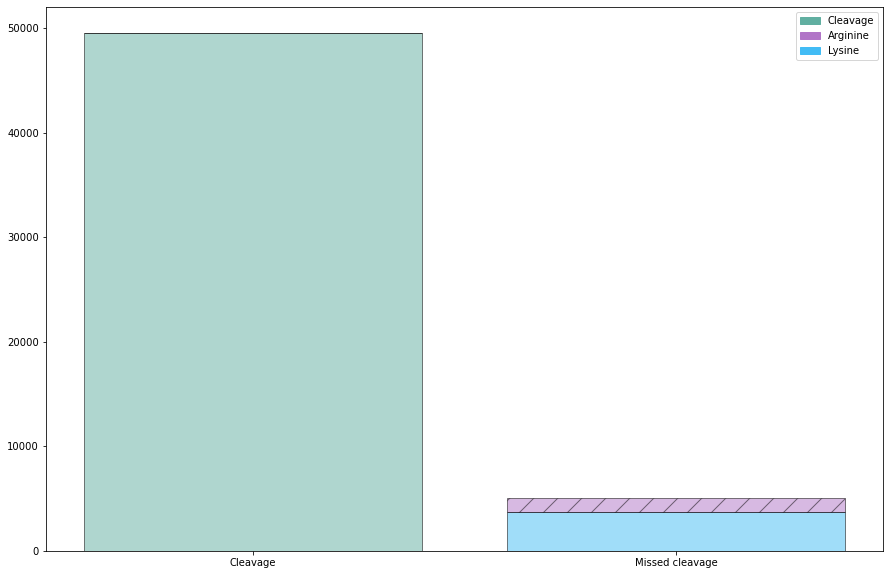

In [77]:
import matplotlib.patches as mpatches

x= ['Cleavage', 'Missed cleavage']
y= [len(Cleavage), 3685]
y1= [1, 1331]
plt.figure(figsize=(15, 10))
plt.bar(x, y, color=["#61afa1",'#42bcf5'], width=0.8, alpha=0.5, edgecolor='black', linewidth=1)
plt.bar(x, y1, color= "#b175c7", width=0.8, alpha=0.5, bottom=y, hatch='/', edgecolor='black', linewidth=1)

Cleavage1 = mpatches.Patch(color='#61afa1', label='Cleavage')
Lysine = mpatches.Patch(color='#b175c7', label='Arginine')
Arginine = mpatches.Patch(color='#42bcf5', label='Lysine')


plt.legend(handles= [Cleavage1, Lysine, Arginine])
plt.show()

In [78]:
df_miss_cleavage['Last_AA'].value_counts()

R    4717
K    1331
Name: Last_AA, dtype: int64

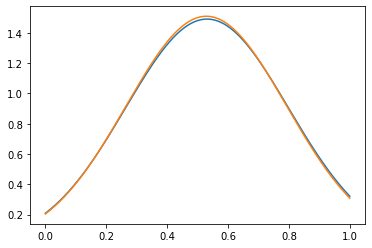

In [79]:
hmean = np.mean(h)
kmean = np.mean(k)

hstd = np.std(h)
kstf= np.std(k)

pdf = stats.norm.pdf(h, hmean, hstd)
pdf1 = stats.norm.pdf(k, kmean, kstf)

plt.plot(h, pdf) 
plt.plot(k, pdf1)

plt.show()

In [80]:
from scipy.stats import ttest_ind

df1 = df[df['relative ASA'] != '']



cat1 = df1[df1['Cleavage']==0]
cat2 = df1[df1['Cleavage']==1]

ttest_ind(Cleavage, Miss_cleavage)

Ttest_indResult(statistic=0.613547015909852, pvalue=0.5395172159287238)

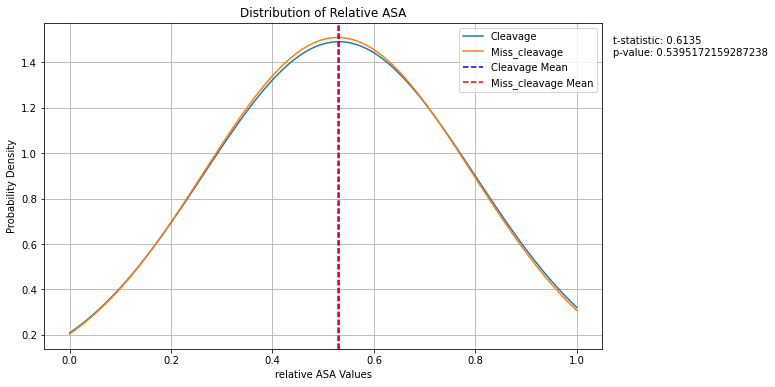

In [81]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t, ttest_ind

# Perform independent t-test
t_statistic, p_value = ttest_ind(Cleavage, Miss_cleavage)

# Generate probability distribution for each group
x = np.linspace(min(min(Cleavage), min(Miss_cleavage)), max(max(Cleavage), max(Miss_cleavage)), 100)
pdf1 = t.pdf(x, df=len(Cleavage)-1, loc=np.mean(Cleavage), scale=np.std(Cleavage))
pdf2 = t.pdf(x, df=len(Miss_cleavage)-1, loc=np.mean(Miss_cleavage), scale=np.std(Miss_cleavage))

# Increase the size of the plot
plt.figure(figsize=(10, 6))

# Plot probability distribution graphs
plt.plot(x, pdf1, label='Cleavage')
plt.plot(x, pdf2, label='Miss_cleavage')


# Add mean thresholds
plt.axvline(np.mean(Cleavage), color='blue', linestyle='--', label='Cleavage Mean')
plt.axvline(np.mean(Miss_cleavage), color='red', linestyle='--', label='Miss_cleavage Mean')

# Set the y-limits to include the full gradient
#plt.ylim([0, max(max(pdf1), max(pdf2)) * 1.1])  # Adjust the multiplier (1.1) as needed

#Adding lables
plt.xlabel('relative ASA Values')
plt.ylabel('Probability Density')
plt.title('Distribution of Relative ASA')
plt.legend()
plt.grid(True)

# Display t-test result
plt.text(1.02, 0.9, f"t-statistic: {t_statistic:.4f}\np-value: {p_value}", transform=plt.gca().transAxes)

# Show the plot
plt.show()


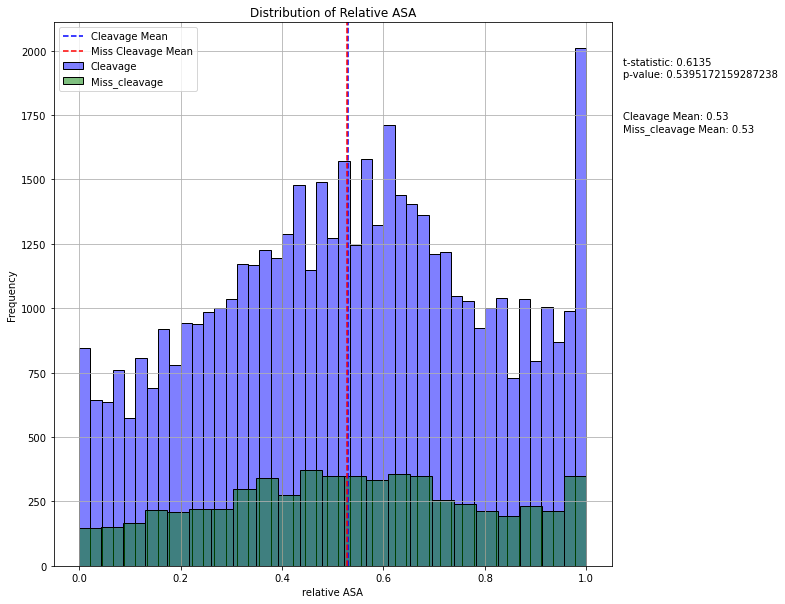

In [82]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t, ttest_ind
import seaborn as sns

# Assuming you have already defined 'Cleavage' and 'Miss_cleavage' arrays

# Perform independent t-test
t_statistic, p_value = ttest_ind(Cleavage, Miss_cleavage)

# Generate probability distribution for each group
x = np.linspace(min(min(Cleavage), min(Miss_cleavage)), max(max(Cleavage), max(Miss_cleavage)), 100)
pdf1 = t.pdf(x, df=len(Cleavage)-1, loc=np.mean(Cleavage), scale=np.std(Cleavage))
pdf2 = t.pdf(x, df=len(Miss_cleavage)-1, loc=np.mean(Miss_cleavage), scale=np.std(Miss_cleavage))

# Increase the size of the plot
plt.figure(figsize=(10, 10))

# Plot probability density curves
#plt.plot(x, pdf1, color='blue', linestyle='-', label='Cleavage')plt.plot(x, pdf2, color='red', linestyle='-', label='Miss_cleavage')

# Overlay histograms or KDE plots
sns.histplot(Cleavage, color='blue', alpha=0.5, label='Cleavage')
sns.histplot(Miss_cleavage, color='green', alpha=0.5, label='Miss_cleavage')

# Add mean thresholds
plt.axvline(np.mean(Cleavage), color='blue', linestyle='--', label='Cleavage Mean')
plt.axvline(np.mean(Miss_cleavage), color='red', linestyle='--', label='Miss Cleavage Mean')

# Adding labels
plt.xlabel('relative ASA')
plt.ylabel('Frequency')
plt.title('Distribution of Relative ASA')
plt.legend()
plt.grid(True)

# Display t-test result and additional statistics
plt.text(1.02, 0.9, f"t-statistic: {t_statistic:.4f}\np-value: {p_value}", transform=plt.gca().transAxes)
plt.text(1.02, 0.8, f"Cleavage Mean: {np.mean(Cleavage):.2f}\nMiss_cleavage Mean: {np.mean(Miss_cleavage):.2f}", transform=plt.gca().transAxes)

# Show the plot
plt.show()

In [83]:
print(len(Cleavage))
print(len(Miss_cleavage))

49535
6048


In [84]:
from Bio.PDB.ResidueDepth import ResidueDepth
def Residue_Depth_and_SASA(df):
    "Prints Residue Depth and SASA calculation to the dataframe"
    PA.get_residue_depth_name(df)
    PA.add_values(df)
    PA.generating_sasa_columns(df)
    return df

In [85]:
df=Residue_Depth_and_SASA(df)
df

5520
Q99470
The file exists!
Q9Y2K5
The file exists!
P07099
The file exists!
Q562E7
The file exists!
P40937
The file exists!
Q9GZN2
The file exists!
Q96RN5
The file exists!
Q9Y247
The file exists!
O60701
The file exists!
Q8IWB9
The file exists!
Q9BSJ5
The file exists!
Q99442
The file exists!
Q9UNI6
The file exists!
Q9UNQ2
The file exists!
Q9UPN7
The file exists!
O00764
The file exists!
Q969H6
The file exists!
Q9BTX3
The file exists!
P09651
The file exists!
P30084
The file exists!
O94979
The file exists!
Q5HYI8
The file exists!
Q658P3
The file exists!
Q96EK4
The file exists!
Q6FI81
The file exists!
Q9UJM3
The file exists!
Q8WTV0
The file exists!
O43615
The file exists!
Q96HC4
The file exists!
Q12904
The file exists!
Q08AE8
The file exists!
P04792
The file exists!
P27695
The file exists!
Q9BZQ8
The file exists!
P61916
The file exists!
Q9NUQ2
The file exists!
Q7Z6M1
The file exists!
Q8IWR0
The file exists!
Q16831
The file exists!
Q16649
The file exists!
Q93100
The file exists!
Q9BZF9
The 

,Sequence,ProteinID,Modifications,start,end,cleavage_sites,Last_AA,LastAA_position,Cleavage,secondary_structure,...,G,H,I,S,T,Acetyl (Protein N-term),Unmodified,res_depth,ca_depth,SASA
0,AAAAAAAAAAAAAAAGAGAGAK,P55011,Unmodified,93,114,AAAAAAAAAAAAAAAGAGAGAK,K,114,0,-,...,0,0,0,0,0,0,1,1.870682,1.999709,196.60
1,AAAAAAAAAAGAAGGR,Q86U42,Acetyl (Protein N-term),2,17,AAAAAAAAAAGAAGGR,R,17,0,-,...,0,0,0,0,0,1,0,1.806892,1.999532,259.30
2,AAAAAAAAAAR,Q8NFD5,Unmodified,5,15,AAAAAAAAAAR,R,15,0,-,...,0,0,0,0,0,0,1,1.739555,1.999580,112.36
3,AAAAAAAGDSDSWDADAFSVEDPVRK,O75822,Acetyl (Protein N-term),2,27,AAAAAAAGDSDSWDADAFSVEDPVR,R,26,1,-,...,0,0,0,0,0,1,0,1.806878,1.999812,231.46
4,AAAAAAAGDSDSWDADAFSVEDPVRK,O75822,Acetyl (Protein N-term),2,27,K,K,27,0,-,...,0,0,0,0,0,1,0,1.916649,1.999362,184.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57047,YYTVFDRDNNR,P07339,Unmodified,393,403,DNNR,R,403,0,E,...,0,0,0,0,0,0,1,3.019147,3.732954,67.05
57048,YYVLNALK,Q6P2Q9,Unmodified,453,460,YYVLNALK,K,460,0,T,...,0,0,0,0,1,0,1,1.980327,1.999783,157.32
57049,YYYAVYDMVVR,P07942,Unmodified,258,268,YYYAVYDMVVR,R,268,0,E,...,0,0,0,0,0,0,1,2.656259,3.639636,94.96
57050,YYYDGDMICK,Q06546,Unmodified,380,389,YYYDGDMICK,K,389,0,E,...,0,0,0,0,0,0,1,2.051413,2.339979,20.13


In [86]:
df_sasa= df

In [87]:
df_sasa.to_csv('sasa_dataframe_A2.csv') #Save the dataframe to a csv file

In [88]:
df = pd.read_csv('sasa_dataframe_A2.csv')
df

,Unnamed: 0,Sequence,ProteinID,Modifications,start,end,cleavage_sites,Last_AA,LastAA_position,Cleavage,...,G,H,I,S,T,Acetyl (Protein N-term),Unmodified,res_depth,ca_depth,SASA
0,0,AAAAAAAAAAAAAAAGAGAGAK,P55011,Unmodified,93,114,AAAAAAAAAAAAAAAGAGAGAK,K,114,0,...,0,0,0,0,0,0,1,1.870682,1.999709,196.60
1,1,AAAAAAAAAAGAAGGR,Q86U42,Acetyl (Protein N-term),2,17,AAAAAAAAAAGAAGGR,R,17,0,...,0,0,0,0,0,1,0,1.806892,1.999532,259.30
2,2,AAAAAAAAAAR,Q8NFD5,Unmodified,5,15,AAAAAAAAAAR,R,15,0,...,0,0,0,0,0,0,1,1.739555,1.999580,112.36
3,3,AAAAAAAGDSDSWDADAFSVEDPVRK,O75822,Acetyl (Protein N-term),2,27,AAAAAAAGDSDSWDADAFSVEDPVR,R,26,1,...,0,0,0,0,0,1,0,1.806878,1.999812,231.46
4,4,AAAAAAAGDSDSWDADAFSVEDPVRK,O75822,Acetyl (Protein N-term),2,27,K,K,27,0,...,0,0,0,0,0,1,0,1.916649,1.999362,184.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55578,57047,YYTVFDRDNNR,P07339,Unmodified,393,403,DNNR,R,403,0,...,0,0,0,0,0,0,1,3.019147,3.732954,67.05
55579,57048,YYVLNALK,Q6P2Q9,Unmodified,453,460,YYVLNALK,K,460,0,...,0,0,0,0,1,0,1,1.980327,1.999783,157.32
55580,57049,YYYAVYDMVVR,P07942,Unmodified,258,268,YYYAVYDMVVR,R,268,0,...,0,0,0,0,0,0,1,2.656259,3.639636,94.96
55581,57050,YYYDGDMICK,Q06546,Unmodified,380,389,YYYDGDMICK,K,389,0,...,0,0,0,0,0,0,1,2.051413,2.339979,20.13


In [89]:
df_cleavage_res_depth= df.loc[df['Cleavage'] == 0]
df_miss_cleavage_res_depth= df.loc[df['Cleavage'] == 1]

In [90]:
res_depth_Cleavage= []
for a in df_cleavage_res_depth['res_depth']:
    res_depth_Cleavage.append(a)


b= sorted(res_depth_Cleavage)

res_depth_Miss_cleavage= []
for c in df_miss_cleavage_res_depth['res_depth']:
    res_depth_Miss_cleavage.append(c)


d= sorted(res_depth_Miss_cleavage)

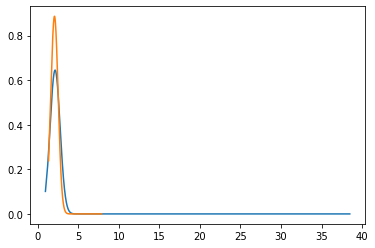

In [91]:
bmean = np.mean(b)
dmean = np.mean(d)

bstd = np.std(b)
dstf= np.std(d)

bpdf = stats.norm.pdf(b, bmean, bstd)
dpdf1 = stats.norm.pdf(d, dmean, dstf)

plt.plot(b, bpdf) 
plt.plot(d, dpdf1)

plt.show()

In [92]:
from scipy.stats import ttest_ind

df1 = df[df['res_depth'] != '']



res_depth_cat1 = df1[df1['Cleavage']==0]
res_depth_cat2 = df1[df1['Cleavage']==1]


ttest_ind(res_depth_Cleavage, res_depth_Miss_cleavage)

Ttest_indResult(statistic=9.088709902026656, pvalue=1.034179999952475e-19)

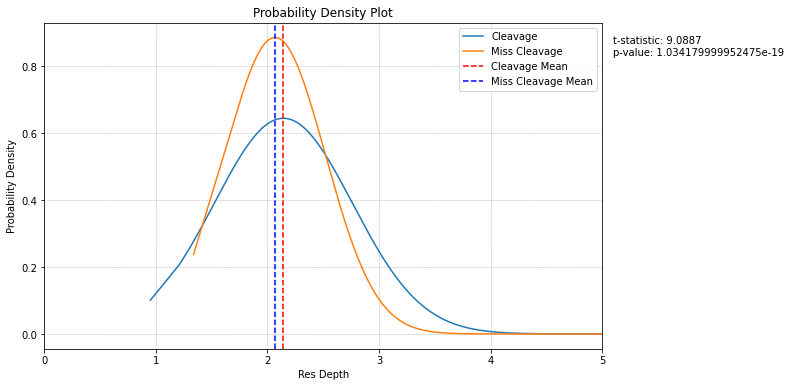

In [93]:
# Perform independent t-test
t_statistic, p_value = ttest_ind(res_depth_Cleavage, res_depth_Miss_cleavage)

# Create lists from dataframes
res_depth_Cleavage = df_cleavage_res_depth['res_depth'].tolist()
res_depth_Miss_cleavage = df_miss_cleavage_res_depth['res_depth'].tolist()

# Sort the lists
res_depth_Cleavage.sort()
res_depth_Miss_cleavage.sort()

# Calculate mean and standard deviation
bmean = np.mean(res_depth_Cleavage)
dmean = np.mean(res_depth_Miss_cleavage)
bstd = np.std(res_depth_Cleavage)
dstf = np.std(res_depth_Miss_cleavage)

# Calculate probability density functions
bpdf = stats.norm.pdf(res_depth_Cleavage, bmean, bstd)
dpdf = stats.norm.pdf(res_depth_Miss_cleavage, dmean, dstf)

# Increase the size of the plot
plt.figure(figsize=(10, 6))

# Plot the probability density functions
plt.plot(res_depth_Cleavage, bpdf, label='Cleavage')
plt.plot(res_depth_Miss_cleavage, dpdf, label='Miss Cleavage')

# Add gridlines
plt.grid(True, linestyle='--', linewidth=0.5)

# Add thresholds
plt.axvline(bmean, color='r', linestyle='--', label='Cleavage Mean')
plt.axvline(dmean, color='b', linestyle='--', label='Miss Cleavage Mean')

# Add legend
plt.legend()

# Set axis labels and title
plt.xlabel('Res Depth')
plt.ylabel('Probability Density')
plt.title('Probability Density Plot')

# Set the limits of the x-axis
xmin = 0  # Set the lower limit of the x-axis
xmax = 5  # Set the upper limit of the x-axis
plt.xlim(xmin, xmax)

# Display t-test result
plt.text(1.02, 0.9, f"t-statistic: {t_statistic:.4f}\np-value: {p_value}", transform=plt.gca().transAxes)

# Show the plot
plt.show()


overflow encountered in power
overflow encountered in multiply


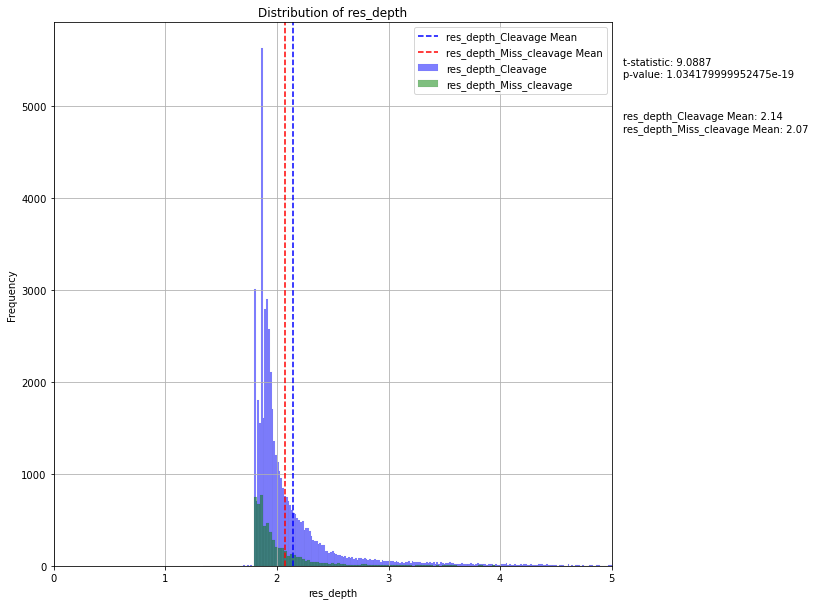

In [94]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t, ttest_ind
import seaborn as sns

# Assuming you have already defined 'res_depth_Cleavage' and 'res_depth_Miss_cleavage' arrays

# Perform independent t-test
t_statistic, p_value = ttest_ind(res_depth_Cleavage, res_depth_Miss_cleavage)

# Generate probability distribution for each group
x = np.linspace(min(min(res_depth_Cleavage), min(res_depth_Miss_cleavage)), max(max(res_depth_Cleavage), max(res_depth_Miss_cleavage)), 100)
pdf1 = t.pdf(x, df=len(res_depth_Cleavage)-1, loc=np.mean(res_depth_Cleavage), scale=np.std(res_depth_Cleavage))
pdf2 = t.pdf(x, df=len(res_depth_Miss_cleavage)-1, loc=np.mean(res_depth_Miss_cleavage), scale=np.std(res_depth_Miss_cleavage))

# Increase the size of the plot
plt.figure(figsize=(10, 10))

# Plot probability density curves
#plt.plot(x, pdf1, color='blue', linestyle='-', label='Cleavage')plt.plot(x, pdf2, color='red', linestyle='-', label='Miss_cleavage')

# Overlay histograms or KDE plots
sns.histplot(res_depth_Cleavage, color='blue', alpha=0.5, label='res_depth_Cleavage')
sns.histplot(res_depth_Miss_cleavage, color='green', alpha=0.5, label='res_depth_Miss_cleavage')

# Add mean thresholds
plt.axvline(np.mean(res_depth_Cleavage), color='blue', linestyle='--', label='res_depth_Cleavage Mean')
plt.axvline(np.mean(res_depth_Miss_cleavage), color='red', linestyle='--', label='res_depth_Miss_cleavage Mean')

# Adding labels
plt.xlabel('res_depth')
plt.ylabel('Frequency')
plt.title('Distribution of res_depth')
plt.legend()
plt.grid(True)

# Set the limits of the x-axis
xmin = 0  # Set the lower limit of the x-axis
xmax = 5  # Set the upper limit of the x-axis
plt.xlim(xmin, xmax)

# Display t-test result and additional statistics
plt.text(1.02, 0.9, f"t-statistic: {t_statistic:.4f}\np-value: {p_value}", transform=plt.gca().transAxes)
plt.text(1.02, 0.8, f"res_depth_Cleavage Mean: {np.mean(res_depth_Cleavage):.2f}\nres_depth_Miss_cleavage Mean: {np.mean(res_depth_Miss_cleavage):.2f}", transform=plt.gca().transAxes)

# Show the plot
plt.show()

In [95]:
df_cleavage_ca_depth= df.loc[df['Cleavage'] == 0]
df_miss_cleavage_ca_depth= df.loc[df['Cleavage'] == 1]

In [96]:
ca_depth_Cleavage= []
for e in df_cleavage_ca_depth['ca_depth']:
    ca_depth_Cleavage.append(e)


f= sorted(ca_depth_Cleavage)

ca_depth_Miss_cleavage= []
for g in df_miss_cleavage_ca_depth['ca_depth']:
    ca_depth_Miss_cleavage.append(g)


I= sorted(ca_depth_Miss_cleavage)

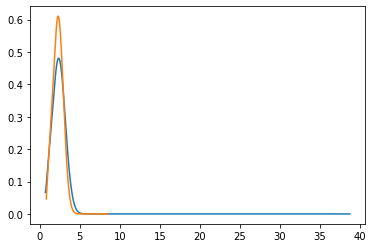

In [97]:
fmean = np.mean(f)
Imean = np.mean(I)

fstd = np.std(f)
Istf= np.std(I)

fpdf = stats.norm.pdf(f, fmean, fstd)
Ipdf1 = stats.norm.pdf(I, Imean, Istf)

plt.plot(f, fpdf) 
plt.plot(I, Ipdf1)

plt.show()

In [98]:
from scipy.stats import ttest_ind

df1 = df[df['ca_depth'] != '']



ca_depth_cat1 = df1[df1['Cleavage']==0]
ca_depth_cat2 = df1[df1['Cleavage']==1]


ttest_ind(ca_depth_Cleavage, ca_depth_Miss_cleavage)

Ttest_indResult(statistic=5.613262331223173, pvalue=1.994913203657322e-08)

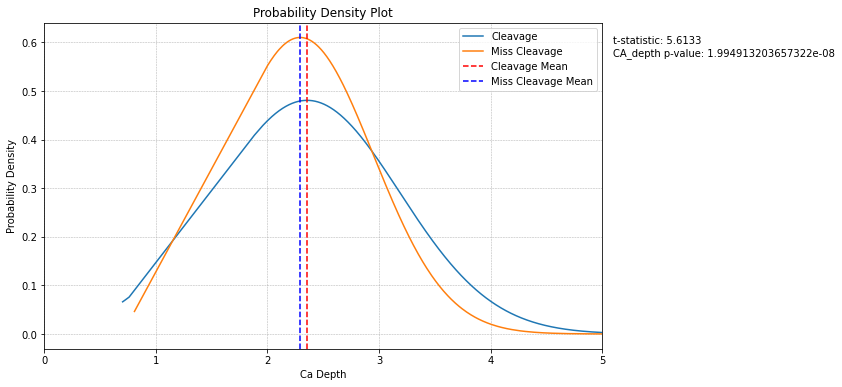

In [99]:
# Perform independent t-test
t_statistic, p_value = ttest_ind(ca_depth_Cleavage, ca_depth_Miss_cleavage)

# Create lists from dataframes
ca_depth_Cleavage = df_cleavage_ca_depth['ca_depth'].tolist()
ca_depth_Miss_cleavage = df_miss_cleavage_ca_depth['ca_depth'].tolist()

# Sort the lists
ca_depth_Cleavage.sort()
ca_depth_Miss_cleavage.sort()


# Calculate probability density functions
bpdf = stats.norm.pdf(ca_depth_Cleavage, fmean, fstd)
dpdf = stats.norm.pdf(ca_depth_Miss_cleavage, Imean, Istf)

# Increase the size of the plot
plt.figure(figsize=(10, 6))

# Plot the probability density functions
plt.plot(ca_depth_Cleavage, fpdf, label='Cleavage')
plt.plot(ca_depth_Miss_cleavage, Ipdf1, label='Miss Cleavage')

# Add gridlines
plt.grid(True, linestyle='--', linewidth=0.5)

# Add thresholds
plt.axvline(fmean, color='r', linestyle='--', label='Cleavage Mean')
plt.axvline(Imean, color='b', linestyle='--', label='Miss Cleavage Mean')

# Add legend
plt.legend()

# Set axis labels and title
plt.xlabel('Ca Depth')
plt.ylabel('Probability Density')
plt.title('Probability Density Plot')

# Set the limits of the x-axis
xmin = 0  # Set the lower limit of the x-axis
xmax = 5  # Set the upper limit of the x-axis
plt.xlim(xmin, xmax)


# Display t-test result
plt.text(1.02, 0.9, f"t-statistic: {t_statistic:.4f}\nCA_depth p-value: {p_value}", transform=plt.gca().transAxes)

# Show the plot
plt.show()

overflow encountered in power
overflow encountered in multiply


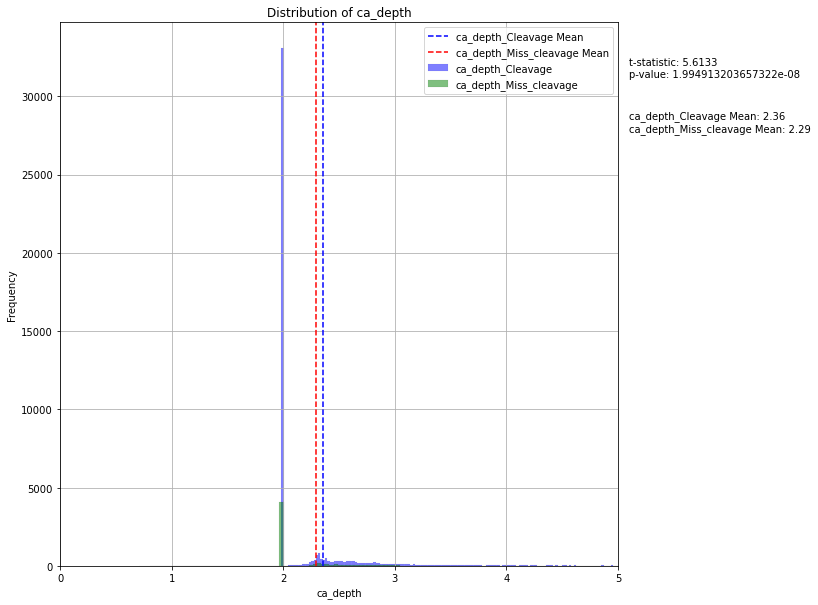

In [100]:

# Perform independent t-test
t_statistic, p_value = ttest_ind(ca_depth_Cleavage, ca_depth_Miss_cleavage)

# Generate probability distribution for each group
x = np.linspace(min(min(ca_depth_Cleavage), min(ca_depth_Miss_cleavage)), max(max(ca_depth_Cleavage), max(ca_depth_Miss_cleavage)), 100)
pdf1 = t.pdf(x, df=len(ca_depth_Cleavage)-1, loc=np.mean(ca_depth_Cleavage), scale=np.std(ca_depth_Cleavage))
pdf2 = t.pdf(x, df=len(ca_depth_Miss_cleavage)-1, loc=np.mean(ca_depth_Miss_cleavage), scale=np.std(ca_depth_Miss_cleavage))

# Increase the size of the plot
plt.figure(figsize=(10, 10))

# Plot probability density curves
#plt.plot(x, pdf1, color='blue', linestyle='-', label='Cleavage')plt.plot(x, pdf2, color='red', linestyle='-', label='Miss_cleavage')

# Overlay histograms or KDE plots
sns.histplot(ca_depth_Cleavage, color='blue', alpha=0.5, label='ca_depth_Cleavage')
sns.histplot(ca_depth_Miss_cleavage, color='green', alpha=0.5, label='ca_depth_Miss_cleavage')

# Add mean thresholds
plt.axvline(np.mean(ca_depth_Cleavage), color='blue', linestyle='--', label='ca_depth_Cleavage Mean')
plt.axvline(np.mean(ca_depth_Miss_cleavage), color='red', linestyle='--', label='ca_depth_Miss_cleavage Mean')

# Adding labels
plt.xlabel('ca_depth')
plt.ylabel('Frequency')
plt.title('Distribution of ca_depth')
plt.legend()
plt.grid(True)

# Set the limits of the x-axis
xmin = 0  # Set the lower limit of the x-axis
xmax = 5  # Set the upper limit of the x-axis
plt.xlim(xmin, xmax)


# Display t-test result and additional statistics
plt.text(1.02, 0.9, f"t-statistic: {t_statistic:.4f}\np-value: {p_value}", transform=plt.gca().transAxes)
plt.text(1.02, 0.8, f"ca_depth_Cleavage Mean: {np.mean(ca_depth_Cleavage):.2f}\nca_depth_Miss_cleavage Mean: {np.mean(ca_depth_Miss_cleavage):.2f}", transform=plt.gca().transAxes)

# Show the plot
plt.show()

In [101]:
df_cleavage_SASA= df.loc[df['Cleavage'] == 0]
df_miss_cleavage_SASA= df.loc[df['Cleavage'] == 1]

In [102]:
df_cleavage_SASA.dropna()
df_miss_cleavage_SASA.dropna()

,Unnamed: 0,Sequence,ProteinID,Modifications,start,end,cleavage_sites,Last_AA,LastAA_position,Cleavage,...,G,H,I,S,T,Acetyl (Protein N-term),Unmodified,res_depth,ca_depth,SASA
3,3,AAAAAAAGDSDSWDADAFSVEDPVRK,O75822,Acetyl (Protein N-term),2,27,AAAAAAAGDSDSWDADAFSVEDPVR,R,26,1,...,0,0,0,0,0,1,0,1.806878,1.999812,231.46
8,8,AAAAAAGSGTPREEEGPAGEAAASQPQAPTSVPGAR,Q9NR33,Acetyl (Protein N-term),2,37,AAAAAAGSGTPR,R,13,1,...,0,0,0,0,0,1,0,1.832711,1.999703,219.47
29,29,AAADGDDSLYPIAVLIDELRNEDVQLR,P30153,Acetyl (Protein N-term),2,28,AAADGDDSLYPIAVLIDELR,R,21,1,...,0,0,0,0,1,1,0,1.879295,1.999522,132.78
50,50,AAALEFLNRFEEAK,P31948,Unmodified,79,92,AAALEFLNR,R,87,1,...,0,0,0,0,0,0,1,1.963765,1.999586,69.26
56,56,AAAMDVDTPSGTNSGAGKK,P62877,Acetyl (Protein N-term),2,20,AAAMDVDTPSGTNSGAGK,K,19,1,...,0,0,0,0,0,1,0,1.901196,1.999585,190.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55549,57018,YYMNQVEETRYCVDQNLLK,P52888,Unmodified,339,357,YYMNQVEETR,R,348,1,...,0,1,0,0,0,0,1,1.874732,1.999861,133.87
55557,57026,YYPTEDVPRK,Q02878,Unmodified,115,124,YYPTEDVPR,R,123,1,...,0,0,0,0,0,0,1,1.806877,1.999525,224.84
55561,57030,YYQLFLDSLRDPNK,Q96EK5,Unmodified,516,529,YYQLFLDSLR,R,525,1,...,0,0,0,1,0,0,1,1.985984,2.540698,83.79
55564,57033,YYREVLPGEIVEISR,Q06203,Unmodified,246,260,YYR,R,248,1,...,0,0,0,0,0,0,1,2.217084,1.999686,53.09


In [103]:
SASA_Cleavage= []
for j in df_cleavage_SASA['SASA']:
    SASA_Cleavage.append(j)


l= sorted(SASA_Cleavage)

SASA_Miss_cleavage= []
for m in df_miss_cleavage_SASA['SASA']:
    SASA_Miss_cleavage.append(m)


n= sorted(SASA_Miss_cleavage)

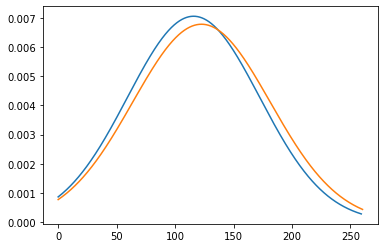

In [104]:
lmean = np.mean(l)
nmean = np.mean(n)

lstd = np.std(l)
nstf= np.std(n)

lpdf = stats.norm.pdf(l, lmean, lstd)
npdf1 = stats.norm.pdf(n, nmean, nstf)

plt.plot(l, lpdf) 
plt.plot(n, npdf1)

plt.show()

In [105]:
from scipy.stats import ttest_ind

df1 = df[df['SASA'] != '']



SASA_cat1 = df1[df1['Cleavage']==0]
SASA_cat2 = df1[df1['Cleavage']==1]


ttest_ind(SASA_Cleavage, SASA_Miss_cleavage)

Ttest_indResult(statistic=-8.736997594869452, pvalue=2.4590661039745712e-18)

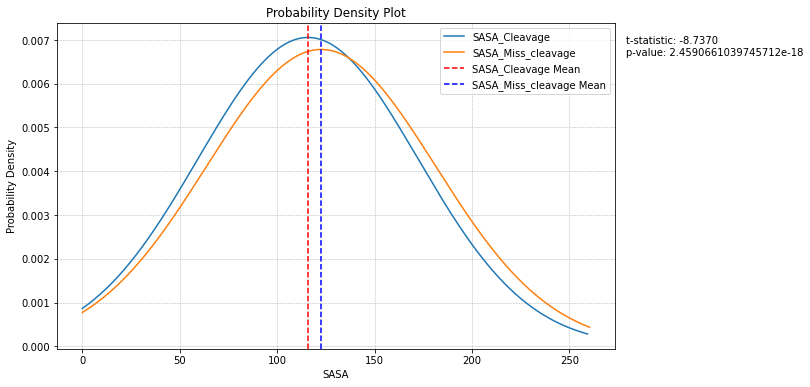

In [106]:
# Perform independent t-test
t_statistic, p_value = ttest_ind(SASA_Cleavage, SASA_Miss_cleavage)

# Create lists from dataframes
SASA_Cleavage = df_cleavage_SASA['SASA'].tolist()
SASA_Miss_cleavage = df_miss_cleavage_SASA['SASA'].tolist()

# Sort the lists
SASA_Cleavage.sort()
SASA_Miss_cleavage.sort()


# Calculate probability density functions
bpdf = stats.norm.pdf(SASA_Cleavage, lmean, lstd)
dpdf = stats.norm.pdf(SASA_Miss_cleavage, nmean, nstf)

# Increase the size of the plot
plt.figure(figsize=(10, 6))

# Plot the probability density functions
plt.plot(SASA_Cleavage, lpdf, label='SASA_Cleavage')
plt.plot(SASA_Miss_cleavage, npdf1, label='SASA_Miss_cleavage')

# Add gridlines
plt.grid(True, linestyle='--', linewidth=0.5)

# Add thresholds
plt.axvline(lmean, color='r', linestyle='--', label='SASA_Cleavage Mean')
plt.axvline(nmean, color='b', linestyle='--', label='SASA_Miss_cleavage Mean')

# Add legend
plt.legend()

# Set axis labels and title
plt.xlabel('SASA')
plt.ylabel('Probability Density')
plt.title('Probability Density Plot')

# Display t-test result
plt.text(1.02, 0.9, f"t-statistic: {t_statistic:.4f}\np-value: {p_value}", transform=plt.gca().transAxes)

# Show the plot
plt.show()

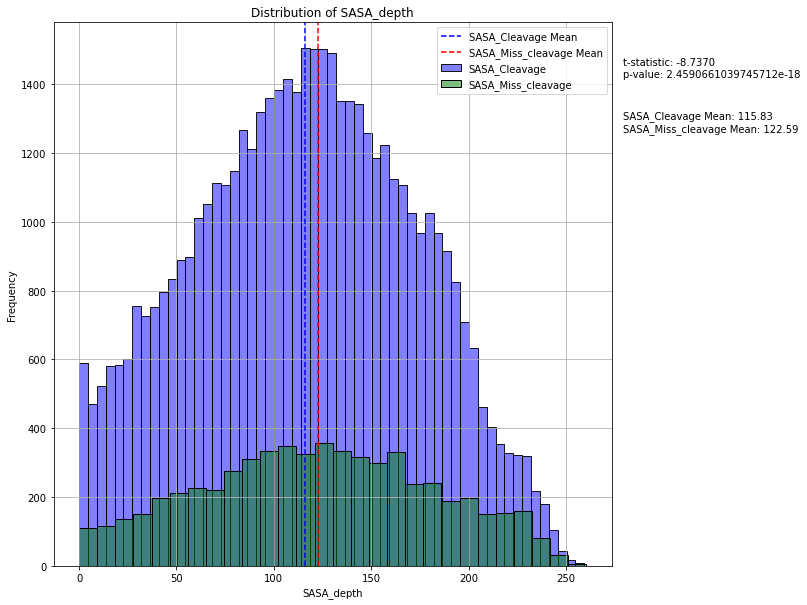

In [107]:
# Perform independent t-test
t_statistic, p_value = ttest_ind(SASA_Cleavage, SASA_Miss_cleavage)

# Generate probability distribution for each group
x = np.linspace(min(min(SASA_Cleavage), min(SASA_Miss_cleavage)), max(max(SASA_Cleavage), max(SASA_Miss_cleavage)), 100)
pdf1 = t.pdf(x, df=len(SASA_Cleavage)-1, loc=np.mean(SASA_Cleavage), scale=np.std(SASA_Cleavage))
pdf2 = t.pdf(x, df=len(SASA_Miss_cleavage)-1, loc=np.mean(SASA_Miss_cleavage), scale=np.std(SASA_Miss_cleavage))

# Increase the size of the plot
plt.figure(figsize=(10, 10))

# Plot probability density curves
#plt.plot(x, pdf1, color='blue', linestyle='-', label='Cleavage')plt.plot(x, pdf2, color='red', linestyle='-', label='Miss_cleavage')

# Overlay histograms or KDE plots
sns.histplot(SASA_Cleavage, color='blue', alpha=0.5, label='SASA_Cleavage')
sns.histplot(SASA_Miss_cleavage, color='green', alpha=0.5, label='SASA_Miss_cleavage')

# Add mean thresholds
plt.axvline(np.mean(SASA_Cleavage), color='blue', linestyle='--', label='SASA_Cleavage Mean')
plt.axvline(np.mean(SASA_Miss_cleavage), color='red', linestyle='--', label='SASA_Miss_cleavage Mean')

# Adding labels
plt.xlabel('SASA_depth')
plt.ylabel('Frequency')
plt.title('Distribution of SASA_depth')
plt.legend()
plt.grid(True)

# Display t-test result and additional statistics
plt.text(1.02, 0.9, f"t-statistic: {t_statistic:.4f}\np-value: {p_value}", transform=plt.gca().transAxes)
plt.text(1.02, 0.8, f"SASA_Cleavage Mean: {np.mean(SASA_Cleavage):.2f}\nSASA_Miss_cleavage Mean: {np.mean(SASA_Miss_cleavage):.2f}", transform=plt.gca().transAxes)

# Show the plot
plt.show()

In [108]:
#change cleavage values from 0 to 1 if the peptide has a duplicate that has cleavage value1
df['Cleavage']= df.duplicated(subset=[ 'ProteinID','cleavage_sites', 'LastAA_position'], keep=False) #keep=False to drop duplicates
df['Cleavage']= df['Cleavage'].astype(int) #convert to int

In [109]:

def check_duplicates(df, seq, elem_id, res_depth, Cleavage):
    
    different_groups = True if df[(df.cleavage_sites == seq) & (df.res_depth == res_depth) & (df.ProteinID == elem_id)]['Cleavage'].nunique() > 1 else False 
    sequence_dupls = True if len(df[df.cleavage_sites == seq]) > 1 else False
    id_dupls = True if len(df[df.ProteinID == elem_id]) > 1 else False
    res_depth_dupls = True if len(df[df.res_depth == res_depth]) > 1 else False
    
    if sequence_dupls and id_dupls and res_depth_dupls and different_groups:
        return 1 
    else:
        return Cleavage


df['Cleavage'] = df.apply(lambda row: check_duplicates(df, row.cleavage_sites, row.ProteinID, row.res_depth,row.Cleavage), axis=1)


# Machine learning #

In [110]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

In [111]:
print(df.columns)

Index(['Unnamed: 0', 'Sequence', 'ProteinID', 'Modifications', 'start', 'end',
       'cleavage_sites', 'Last_AA', 'LastAA_position', 'Cleavage',
       'secondary_structure', 'relative ASA', 'phi', 'psi', 'NH01R', 'NH01E',
       'ONH1', 'ONHE', 'NH2R', 'NO2E', 'ONH2R', 'ONH2E', '-', 'B', 'E', 'G',
       'H', 'I', 'S', 'T', 'Acetyl (Protein N-term)', 'Unmodified',
       'res_depth', 'ca_depth', 'SASA'],
      dtype='object')


In [112]:
df_miss_cleavage= df.loc[df['Cleavage'] == 1]
len(df_miss_cleavage)

7304

In [113]:
df_cleavage= df.loc[df['Cleavage'] == 0]
df_cleavage= df_cleavage.sample(n=7304)
df_test= pd.concat([df_miss_cleavage, df_cleavage])

In [114]:
df_test.to_csv('df_test1_A2.csv', index=False)

In [115]:
df_test['Cleavage'].value_counts()

1    7304
0    7304
Name: Cleavage, dtype: int64

In [116]:
df_test

,Unnamed: 0,Sequence,ProteinID,Modifications,start,end,cleavage_sites,Last_AA,LastAA_position,Cleavage,...,G,H,I,S,T,Acetyl (Protein N-term),Unmodified,res_depth,ca_depth,SASA
7,7,AAAAAAGSGTPR,Q9NR33,Acetyl (Protein N-term),2,13,AAAAAAGSGTPR,R,13,1,...,0,0,0,0,0,1,0,1.832711,1.999703,219.47
8,8,AAAAAAGSGTPREEEGPAGEAAASQPQAPTSVPGAR,Q9NR33,Acetyl (Protein N-term),2,37,AAAAAAGSGTPR,R,13,1,...,0,0,0,0,0,1,0,1.832711,1.999703,219.47
28,28,AAADGDDSLYPIAVLIDELR,P30153,Acetyl (Protein N-term),2,21,AAADGDDSLYPIAVLIDELR,R,21,1,...,0,0,0,0,1,1,0,1.879295,1.999522,132.78
29,29,AAADGDDSLYPIAVLIDELRNEDVQLR,P30153,Acetyl (Protein N-term),2,28,AAADGDDSLYPIAVLIDELR,R,21,1,...,0,0,0,0,1,1,0,1.879295,1.999522,132.78
49,49,AAALEFLNR,P31948,Unmodified,79,87,AAALEFLNR,R,87,1,...,0,0,0,0,0,0,1,1.963765,1.999586,69.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6729,6877,DNPNLLFNMCGFECR,Q6P2Q9,Unmodified,1181,1195,DNPNLLFNMCGFECR,R,1195,0,...,0,0,0,0,0,0,1,4.117365,6.231310,29.64
2403,2461,ALQQQLR,Q96G46,Unmodified,213,219,ALQQQLR,R,219,0,...,0,1,0,0,0,0,1,1.894886,1.999552,155.41
12575,12878,FQMTQEVVCDECPNVK,Q9UBS4,Unmodified,185,200,FQMTQEVVCDECPNVK,K,200,0,...,0,0,0,0,0,0,1,2.111478,1.999553,132.95
28153,28901,LQGILADLR,Q9NRL3,Unmodified,353,361,LQGILADLR,R,361,0,...,0,0,0,1,0,0,1,1.854222,1.999799,198.14


In [117]:
missing_columns = df_test.columns[df_test.isna().any()].tolist()
print(missing_columns)

[]


In [118]:
column_name = 'SASA'  # Replace 'Column1' with your actual column name
df_test[column_name] = df_test[column_name].fillna(0)

In [119]:
df_test['SASA']

7        219.47
8        219.47
28       132.78
29       132.78
49        69.26
          ...  
6729      29.64
2403     155.41
12575    132.95
28153    198.14
11068     76.87
Name: SASA, Length: 14608, dtype: float64

In [120]:
x = df_test[['relative ASA', 'phi', 'psi', 'NH01R', 'NH01E',
       'ONH1', 'ONHE', 'NH2R', 'NO2E', 'ONH2R', 'ONH2E', '-', 'B', 'E', 'G',
       'H', 'I', 'S', 'T', 'Acetyl (Protein N-term)', 'Unmodified',
       'res_depth', 'ca_depth', 'SASA']]
       
y = df_test['Cleavage']

In [121]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Reshape x array
x_reshaped = x_scaled.reshape(-1, len(x.columns))

# Perform PCA
pca = PCA()
x_pca = pca.fit_transform(x_reshaped)

# Variance explained by each principal component
explained_variance = pca.explained_variance_ratio_

# Print the variance explained by each principal component
for i, var in enumerate(explained_variance):
    print(f"Principal Component {i+1}: {var:.4f}")

# You can also access the principal components themselves
principal_components = pca.components_

# Accessing the first two principal components (for visualization purposes, if desired)
pc1 = x_pca[:, 0]
pc2 = x_pca[:, 1]

Principal Component 1: 0.1820
Principal Component 2: 0.1043
Principal Component 3: 0.0919
Principal Component 4: 0.0808
Principal Component 5: 0.0612
Principal Component 6: 0.0551
Principal Component 7: 0.0468
Principal Component 8: 0.0439
Principal Component 9: 0.0425
Principal Component 10: 0.0417
Principal Component 11: 0.0354
Principal Component 12: 0.0345
Principal Component 13: 0.0329
Principal Component 14: 0.0309
Principal Component 15: 0.0251
Principal Component 16: 0.0235
Principal Component 17: 0.0221
Principal Component 18: 0.0177
Principal Component 19: 0.0171
Principal Component 20: 0.0059
Principal Component 21: 0.0039
Principal Component 22: 0.0010
Principal Component 23: 0.0000
Principal Component 24: 0.0000


1.0


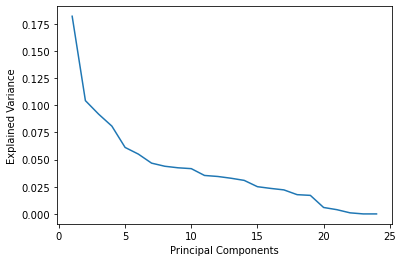

In [122]:
print(pca.explained_variance_ratio_.sum())
plt.plot(range(1,25),pca.explained_variance_ratio_)
plt.xlabel("Principal Components")
plt.ylabel("Explained Variance")
plt.show()
# observations:
#each PC captures less than the first, as expected.
#first 2 PCs capture 

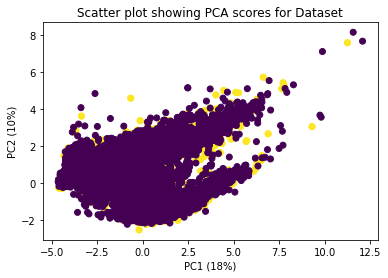

In [123]:
import matplotlib.pyplot as plt

# Replace sample_colours with your numerical variable for color mapping
sample_colours = df_test['Cleavage'].values

# Plotting the scatter plot using the first two principal components
plt.scatter(pc1, pc2, c=sample_colours, cmap='viridis')
plt.xlabel('PC1 (' + str(round(explained_variance[0] * 100)) + '%)')
plt.ylabel('PC2 (' + str(round(explained_variance[1] * 100)) + '%)')
plt.title('Scatter plot showing PCA scores for Dataset')

# Show the plot
plt.show()

In [124]:
len(df_test['Cleavage'])

14608

In [125]:
# from sklearn.tree import plot_tree

# X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

# clf = RandomForestClassifier(n_estimators=1000)
# clf.fit(X_train,y_train)
# y_pred=clf.predict(X_test)

In [126]:
from sklearn.tree import plot_tree

X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

clf = RandomForestClassifier(n_estimators=1000)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

In [127]:
# from Bio.PDB.ResidueDepth import ResidueDepth
# from Bio.PDB.SASA import ShrakeRupley
# from sklearn.model_selection import train_test_split
# from sklearn.utils import resample
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

# # Define the random forest classifier
# clf = RandomForestClassifier(n_estimators=1000, random_state=42)

# # Define the number of bootstrap iterations
# n_iterations = 100

# # Define a list to store the accuracy scores for each iteration
# scores = []

# # Perform bootstrap validation
# for i in range(n_iterations):
#     # Generate a bootstrap sample from the training data
#     X_train_boot, y_train_boot = resample(X_train, y_train, random_state=i)

#     # Train the random forest classifier on the bootstrap sample
#     clf.fit(X_train_boot, y_train_boot)
    
#     # Predict the classes of the testing data
#     y_pred = clf.predict(X_test)
    
#     # Compute the accuracy score on the testing data
#     score = accuracy_score(y_test, y_pred)
    
#     # Store the accuracy score for this iteration
#     scores.append(score)

# # Calculate the mean and standard deviation of the accuracy scores
# mean_score = np.mean(scores)
# std_score = np.std(scores)

# # Print the results
# print("Bootstrap validation results:")
# print("Mean accuracy score:", mean_score)
# print("Standard deviation of accuracy scores:", std_score)


Accuracy:  0.8083242059145673


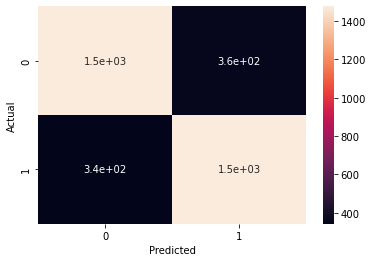

In [128]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
plt.show()

Accuracy: 0.8083242059145673


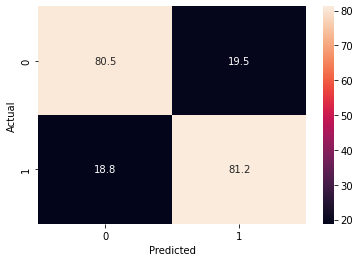

In [129]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])

# Calculate row-wise percentages
row_sums = confusion_matrix.sum(axis=1)
confusion_matrix_percent = confusion_matrix.div(row_sums, axis=0) * 100

# Display the confusion matrix with percentages
sn.heatmap(confusion_matrix_percent, annot=True, fmt=".1f")  # Use ".1f" to display one decimal place

print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
plt.show()

In [131]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

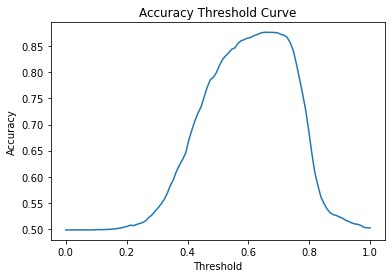

In [132]:
thresholds = np.linspace(0, 1, num=100)
accuracies = []
for threshold in thresholds:
    y_pred_threshold = (clf.predict_proba(X_test)[:, 1] >= threshold).astype(int)
    accuracy = accuracy_score(y_test, y_pred_threshold)
    accuracies.append(accuracy)

plt.plot(thresholds, accuracies)
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.title('Accuracy Threshold Curve')
plt.show()

In [133]:
# Compute the confidence scores for the testing data
y_confidence = clf.predict_proba(X_test)
y_confidence = [probability[1] for probability in y_confidence]
y_confidence_formatted = ["{:.3f}".format(num) for num in y_confidence]

In [134]:
# Compare predictions with truth values
ProteinIDs=df['ProteinID'].tolist()
data_frame=pd.DataFrame({'relative ASA':X_test['relative ASA'] ,'Prediction':y_pred,'Probability':y_confidence_formatted})
merged_df = pd.merge(data_frame, df, on='relative ASA')
merged_df = merged_df[['ProteinID', 'start', 'end', 'cleavage_sites', 'Cleavage', 'Prediction','Probability']]
print(merged_df)

       ProteinID  start   end       cleavage_sites  Cleavage  Prediction  \
0         Q8N8S7     11    22                    K         0           1   
1         P42704    974   980              ADAVWNK         0           1   
2         P28838    304   321   ADMGGAATICSAIVSAAK         0           1   
3         Q92783    233   249    AGEIITVLDDSDPNWWK         0           1   
4         Q9H1A4   1703  1709              AGQLSYK         0           1   
...          ...    ...   ...                  ...       ...         ...   
611762    O75122    339   350         WSTANPSTVAGR         0           1   
611763    Q96PD2    597   608         YSSSEVNHLSPR         0           1   
611764    Q8TCZ2    243   262  YSTLHTQSAEPPPPPEPAR         0           1   
611765    Q9NX55     46    62    EIQSSNLETAMSVIGDR         1           1   
611766    Q9NX55     46    63    EIQSSNLETAMSVIGDR         1           1   

       Probability  
0            0.510  
1            0.510  
2            0.510  
3  

In [135]:
# select rows where the value in Prediction is equal to 1
df_ones = merged_df[merged_df['Prediction'] == 1]

# sort the resulting dataframe by the values in Probability in ascending order
df_ones_sorted = df_ones.sort_values('Probability', ascending=True)

# select the first row with the lowest Probability
result = df_ones_sorted.iloc[0]
threshold=result['Probability']
print(threshold)

0.501


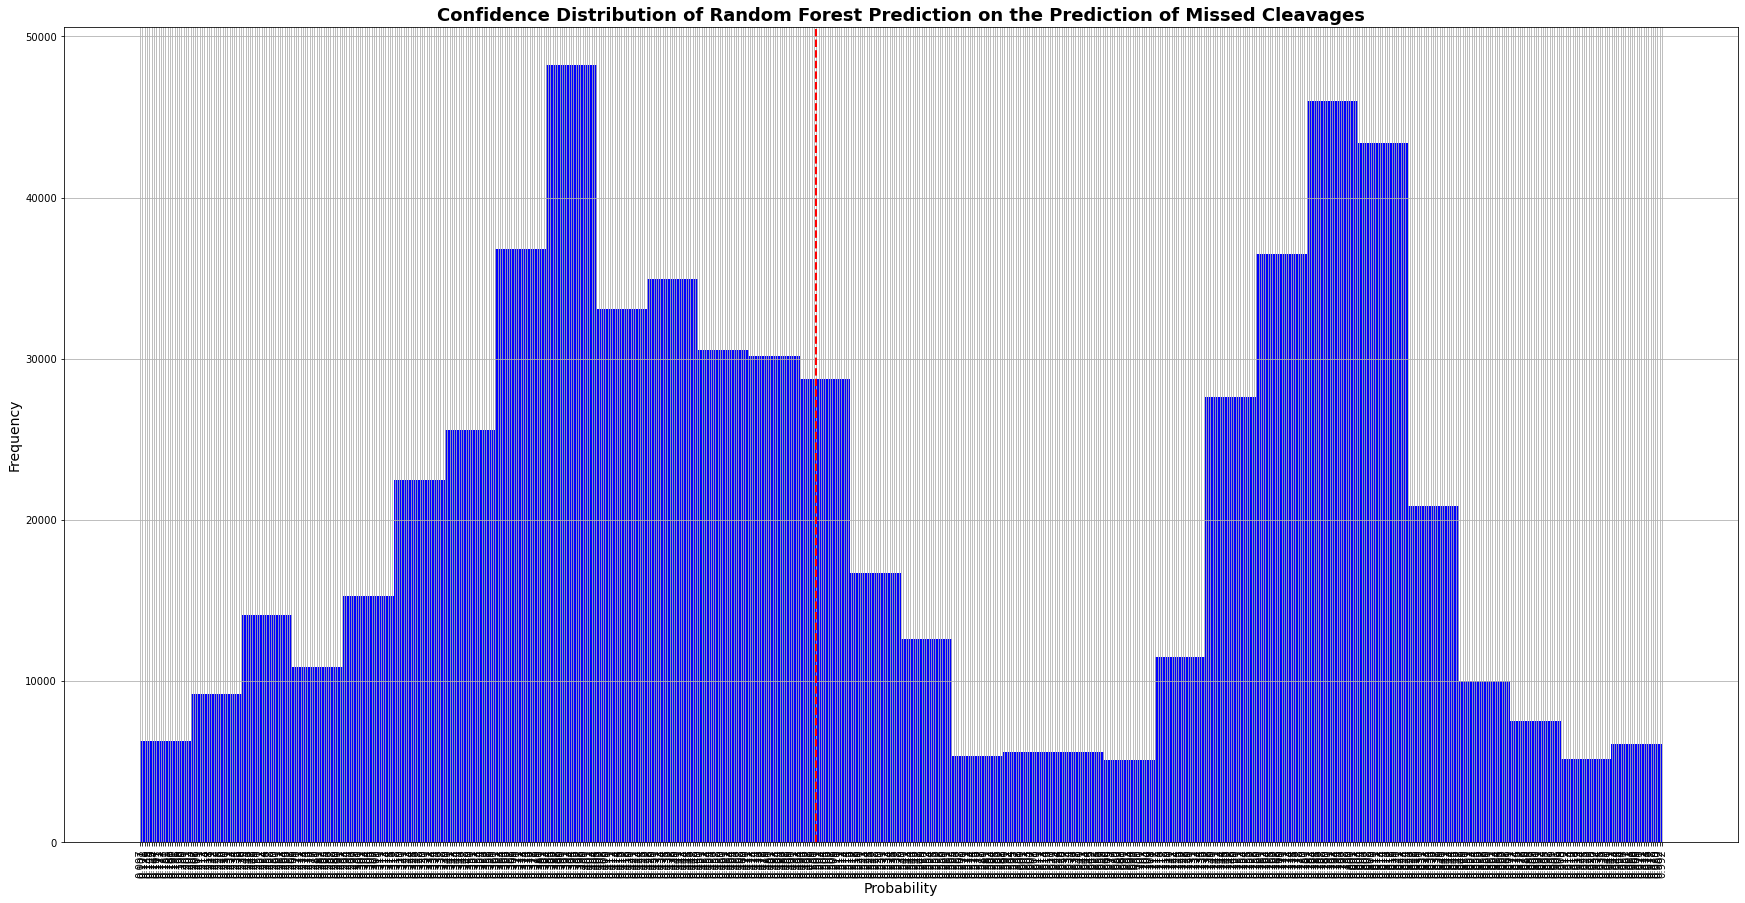

In [136]:
# Sort the Order_df dataframe by the 'end' column
Order_df = merged_df.sort_values('Probability')


# Create a figure and an axis object for the plot
fig, ax1 = plt.subplots(figsize=(30, 15))

# Add a histogram to the axis object
ax1.hist(Order_df['Probability'], bins=30, color='blue')
ax1.set_xlabel('Probability', fontsize=14)
ax1.set_ylabel('Frequency', fontsize=14)
plt.title('Confidence Distribution of Random Forest Prediction on the Prediction of Missed Cleavages', fontsize=18, fontweight='bold')

# Customize the appearance of the plot
ax1.set_ylim(0)  # Set the y-axis limits for the first axis

# Add a vertical line at the threshold value
#threshold = 0.5
ax1.axvline(threshold, color='red', linestyle='dashed', linewidth=2)

# rotate x-axis label
plt.xticks(rotation=90)

# Add grid
plt.grid(True)

# Display plot
plt.show()

In [137]:
# Set the threshold value
threshold = input('Input threshold:')

# Filter the dataframe based on the threshold value
filtered_df = merged_df[merged_df['Probability'] > threshold]

# Print the filtered dataframe
print(filtered_df)

Input threshold: 0.501


       ProteinID  start   end       cleavage_sites  Cleavage  Prediction  \
0         Q8N8S7     11    22                    K         0           1   
1         P42704    974   980              ADAVWNK         0           1   
2         P28838    304   321   ADMGGAATICSAIVSAAK         0           1   
3         Q92783    233   249    AGEIITVLDDSDPNWWK         0           1   
4         Q9H1A4   1703  1709              AGQLSYK         0           1   
...          ...    ...   ...                  ...       ...         ...   
611762    O75122    339   350         WSTANPSTVAGR         0           1   
611763    Q96PD2    597   608         YSSSEVNHLSPR         0           1   
611764    Q8TCZ2    243   262  YSTLHTQSAEPPPPPEPAR         0           1   
611765    Q9NX55     46    62    EIQSSNLETAMSVIGDR         1           1   
611766    Q9NX55     46    63    EIQSSNLETAMSVIGDR         1           1   

       Probability  
0            0.510  
1            0.510  
2            0.510  
3  

In [138]:
import shap

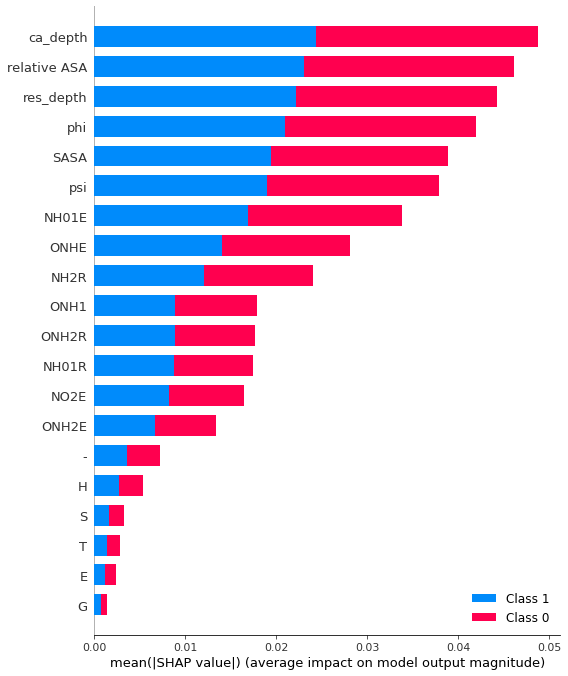

In [161]:
explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)
plt.show()

In [140]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.80      0.81      1833
           1       0.80      0.81      0.81      1819

    accuracy                           0.81      3652
   macro avg       0.81      0.81      0.81      3652
weighted avg       0.81      0.81      0.81      3652



# XG Boost #

 XGBoost, or eXtreme Gradient Boosting, is a machine learning algorithm that is particularly good at making accurate predictions. It belongs to a family of algorithms called gradient boosting, which combines multiple weak prediction models to create a stronger and more accurate model.

To understand how XGBoost works, let's break it down into simpler steps:

Starting with a Simple Model: XGBoost begins by creating a simple model that makes predictions based on a single feature or a small set of features. This initial model is called a weak learner or a weak predictor.

Evaluating the Model's Performance: The algorithm then evaluates how well the weak learner performs on the training data. It looks at the difference between the actual outcomes and the predictions made by the model.

Focusing on Mistakes: XGBoost focuses on the mistakes made by the weak learner. It analyzes the cases where the predictions were incorrect and assigns higher weights to those cases.

Building a New Model to Correct Mistakes: XGBoost builds a new model that tries to correct the mistakes made by the previous weak learner. This new model is designed to capture the patterns or relationships in the data that the previous model missed.

Combining Weak Models into a Strong Model: The algorithm iteratively repeats steps 2 to 4, creating new weak models and combining them with the existing models. Each new model is built to correct the mistakes of the ensemble of previous models, gradually improving the overall predictive performance.

Making Predictions: Once the boosting process is complete and the desired number of weak models have been created, XGBoost combines the predictions from all the models to make the final prediction. The combined model takes into account the strengths of each weak learner, resulting in a more accurate prediction.

The power of XGBoost lies in its ability to effectively learn from the mistakes of previous models and improve its predictions over time. By combining multiple weak models, XGBoost can create a strong ensemble model that is capable of making highly accurate predictions.

Overall, XGBoost is a powerful and popular algorithm in the field of machine learning, known for its ability to handle complex relationships in data and deliver exceptional predictive performance.

In [141]:
print(df.columns)

Index(['Unnamed: 0', 'Sequence', 'ProteinID', 'Modifications', 'start', 'end',
       'cleavage_sites', 'Last_AA', 'LastAA_position', 'Cleavage',
       'secondary_structure', 'relative ASA', 'phi', 'psi', 'NH01R', 'NH01E',
       'ONH1', 'ONHE', 'NH2R', 'NO2E', 'ONH2R', 'ONH2E', '-', 'B', 'E', 'G',
       'H', 'I', 'S', 'T', 'Acetyl (Protein N-term)', 'Unmodified',
       'res_depth', 'ca_depth', 'SASA'],
      dtype='object')


In [142]:
df_miss_cleavage= df.loc[df['Cleavage'] == 1]
len(df_miss_cleavage)

7304

In [143]:
df_cleavage= df.loc[df['Cleavage'] == 0]
df_cleavage= df_cleavage.sample(n=7304)
df_test= pd.concat([df_miss_cleavage, df_cleavage])

In [144]:
df_test.to_csv('df_xgboostA2.csv', index=False)

In [145]:
df_test['Cleavage'].value_counts()

1    7304
0    7304
Name: Cleavage, dtype: int64

In [146]:
df_test

,Unnamed: 0,Sequence,ProteinID,Modifications,start,end,cleavage_sites,Last_AA,LastAA_position,Cleavage,...,G,H,I,S,T,Acetyl (Protein N-term),Unmodified,res_depth,ca_depth,SASA
7,7,AAAAAAGSGTPR,Q9NR33,Acetyl (Protein N-term),2,13,AAAAAAGSGTPR,R,13,1,...,0,0,0,0,0,1,0,1.832711,1.999703,219.47
8,8,AAAAAAGSGTPREEEGPAGEAAASQPQAPTSVPGAR,Q9NR33,Acetyl (Protein N-term),2,37,AAAAAAGSGTPR,R,13,1,...,0,0,0,0,0,1,0,1.832711,1.999703,219.47
28,28,AAADGDDSLYPIAVLIDELR,P30153,Acetyl (Protein N-term),2,21,AAADGDDSLYPIAVLIDELR,R,21,1,...,0,0,0,0,1,1,0,1.879295,1.999522,132.78
29,29,AAADGDDSLYPIAVLIDELRNEDVQLR,P30153,Acetyl (Protein N-term),2,28,AAADGDDSLYPIAVLIDELR,R,21,1,...,0,0,0,0,1,1,0,1.879295,1.999522,132.78
49,49,AAALEFLNR,P31948,Unmodified,79,87,AAALEFLNR,R,87,1,...,0,0,0,0,0,0,1,1.963765,1.999586,69.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18737,19215,IDISQLVITK,P28340,Unmodified,876,885,IDISQLVITK,K,885,0,...,0,0,0,0,0,0,1,2.312101,1.999626,85.37
40489,41534,RPAEIYHCR,Q9NWU5,Unmodified,63,71,RPAEIYHCR,R,71,0,...,0,0,0,0,0,0,1,2.148041,1.999664,81.20
48559,49813,TVMLIPGDK,Q9P287,Unmodified,292,300,TVMLIPGDK,K,300,0,...,1,0,0,0,0,0,1,2.744855,3.252336,56.32
1685,1724,AIADTGANVVVTGGK,P50990,Unmodified,282,296,AIADTGANVVVTGGK,K,296,0,...,0,0,0,0,0,0,1,2.053416,1.999665,172.57


In [147]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Step 1: Loading preprocessed  data

X = df_test[['relative ASA', 'phi', 'psi', 'NH01R', 'NH01E', 'ONH1', 'ONHE', 'NH2R', 'NO2E',
             'ONH2R', 'ONH2E', '-', 'B', 'E', 'G', 'H', 'I', 'S', 'T', 'Acetyl (Protein N-term)',
             'Unmodified', 'res_depth', 'ca_depth', 'SASA']]  # Features
y = df_test['Cleavage']  # Target variable

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Step 3: Define the XGBoost model
model = xgb.XGBClassifier(learning_rate=0.1, max_depth=3, n_estimators=1000)

# Step 4: Train the model
model.fit(X_train, y_train)

# Step 5: Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6259583789704272


Accuracy:  0.6259583789704272


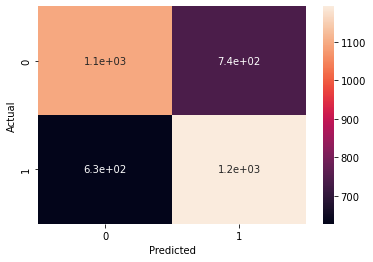

In [148]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
plt.show()

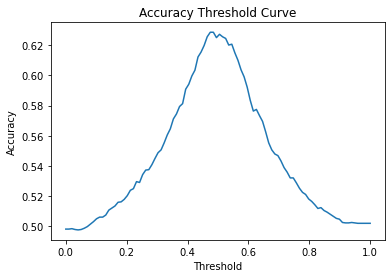

In [149]:
# Evaluate the best model on the test set
y_pred_prob = model.predict_proba(X_test)[:, 1]  # Predicted probabilities for the positive class

# Create the accuracy threshold curve
thresholds = np.linspace(0, 1, 100)  # Vary the threshold from 0 to 1
accuracies = []  # Store the accuracies for each threshold

for threshold in thresholds:
    y_pred_threshold = (y_pred_prob >= threshold).astype(int)  # Apply the threshold to the predicted probabilities
    accuracy = accuracy_score(y_test, y_pred_threshold)  # Compute accuracy
    accuracies.append(accuracy)

# Plot the accuracy threshold curve
plt.plot(thresholds, accuracies)
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.title('Accuracy Threshold Curve')
plt.show()

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


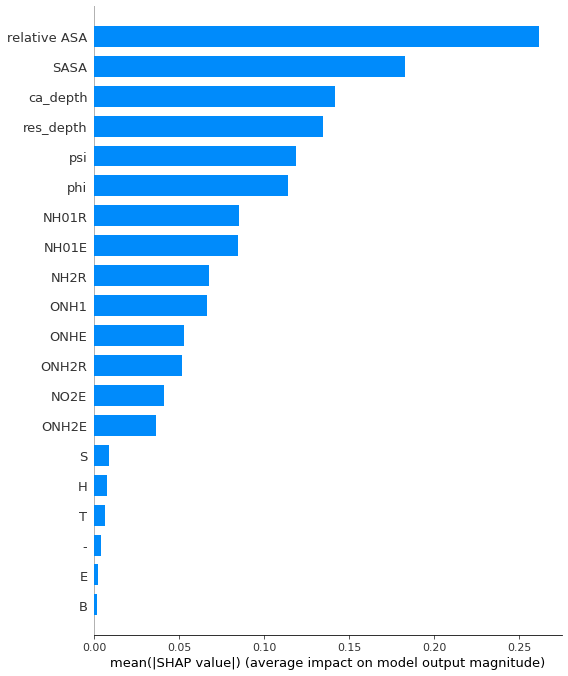

In [150]:
# Generate SHAP values using TreeExplainer
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# Plot detailed feature importance
shap.summary_plot(shap_values, X_test, plot_type="bar")
plt.show()

In [151]:
#optimizing hyperpatameters

from sklearn.model_selection import GridSearchCV

# Define the parameter grid for grid search
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 6, 9]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameter values and the corresponding model
best_learning_rate = grid_search.best_params_['learning_rate']
best_max_depth = grid_search.best_params_['max_depth']
best_model = grid_search.best_estimator_

# Train the best model on the full training set
best_model.fit(X_train, y_train)

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Best Accuracy:", accuracy)

Best Accuracy: 0.7757393209200438


Accuracy:  0.7757393209200438


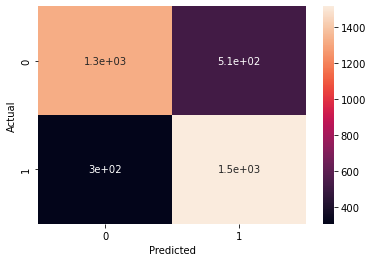

In [152]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
plt.show()

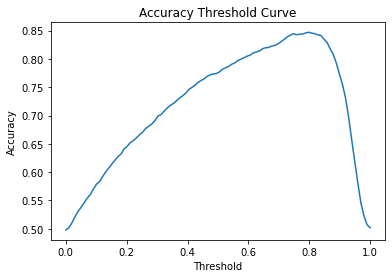

In [153]:
# Evaluate the best model on the test set
y_pred_prob = best_model.predict_proba(X_test)[:, 1]  # Predicted probabilities for the positive class

# Create the accuracy threshold curve
thresholds = np.linspace(0, 1, 100)  # Vary the threshold from 0 to 1
accuracies = []  # Store the accuracies for each threshold

for threshold in thresholds:
    y_pred_threshold = (y_pred_prob >= threshold).astype(int)  # Apply the threshold to the predicted probabilities
    accuracy = accuracy_score(y_test, y_pred_threshold)  # Compute accuracy
    accuracies.append(accuracy)

# Plot the accuracy threshold curve
plt.plot(thresholds, accuracies)
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.title('Accuracy Threshold Curve')
plt.show()

In [154]:
# Get the confidence scores
confidence_scores = best_model.predict_proba(X_test)

# Select the confidence scores for the positive class
positive_scores = confidence_scores[:, 1]


In [155]:
# Compare predictions with truth values
ProteinIDs=df['ProteinID'].tolist()
data_frame=pd.DataFrame({'relative ASA':X_test['relative ASA'] ,'Prediction':y_pred,'Probability':positive_scores})
merged_df = pd.merge(data_frame, df, on='relative ASA')
merged_df = merged_df[['ProteinID', 'start', 'end', 'cleavage_sites', 'Cleavage', 'Prediction','Probability']]
print(merged_df)

       ProteinID  start   end              cleavage_sites  Cleavage  \
0         P30622   1084  1100           AAQTAEDAMQIMEQMTK         0   
1         Q9NUQ3     52    77  ADMLCNSQSNDILQHQGSNCGGTSNK         0   
2         Q96I24      2    15              AELVQGQSAPVGMK         0   
3         Q00653    104   112                   AHAHSLVGK         0   
4         Q13586    582   592                 ALLALNHGLDK         0   
...          ...    ...   ...                         ...       ...   
593142    P21333    774   781                    VYGPGVAK         0   
593143    Q8WY36    149   158                  WCPTTNKPVK         0   
593144    Q9Y6A9    144   155                WLPVQESSTDDK         0   
593145    P07305     28    40               YSDMIVAAIQAEK         0   
593146    Q6FIF0    175   186                YSDVHNCSYNYK         0   

        Prediction  Probability  
0                0     0.104448  
1                0     0.104448  
2                0     0.104448  
3          

In [156]:
# select rows where the value in Prediction is equal to 1
df_ones = merged_df[merged_df['Prediction'] == 1]

# sort the resulting dataframe by the values in Probability in ascending order
df_ones_sorted = df_ones.sort_values('Probability', ascending=True)

# select the first row with the lowest Probability
result = df_ones_sorted.iloc[0]
threshold=result['Probability']
print(threshold)

0.5001308


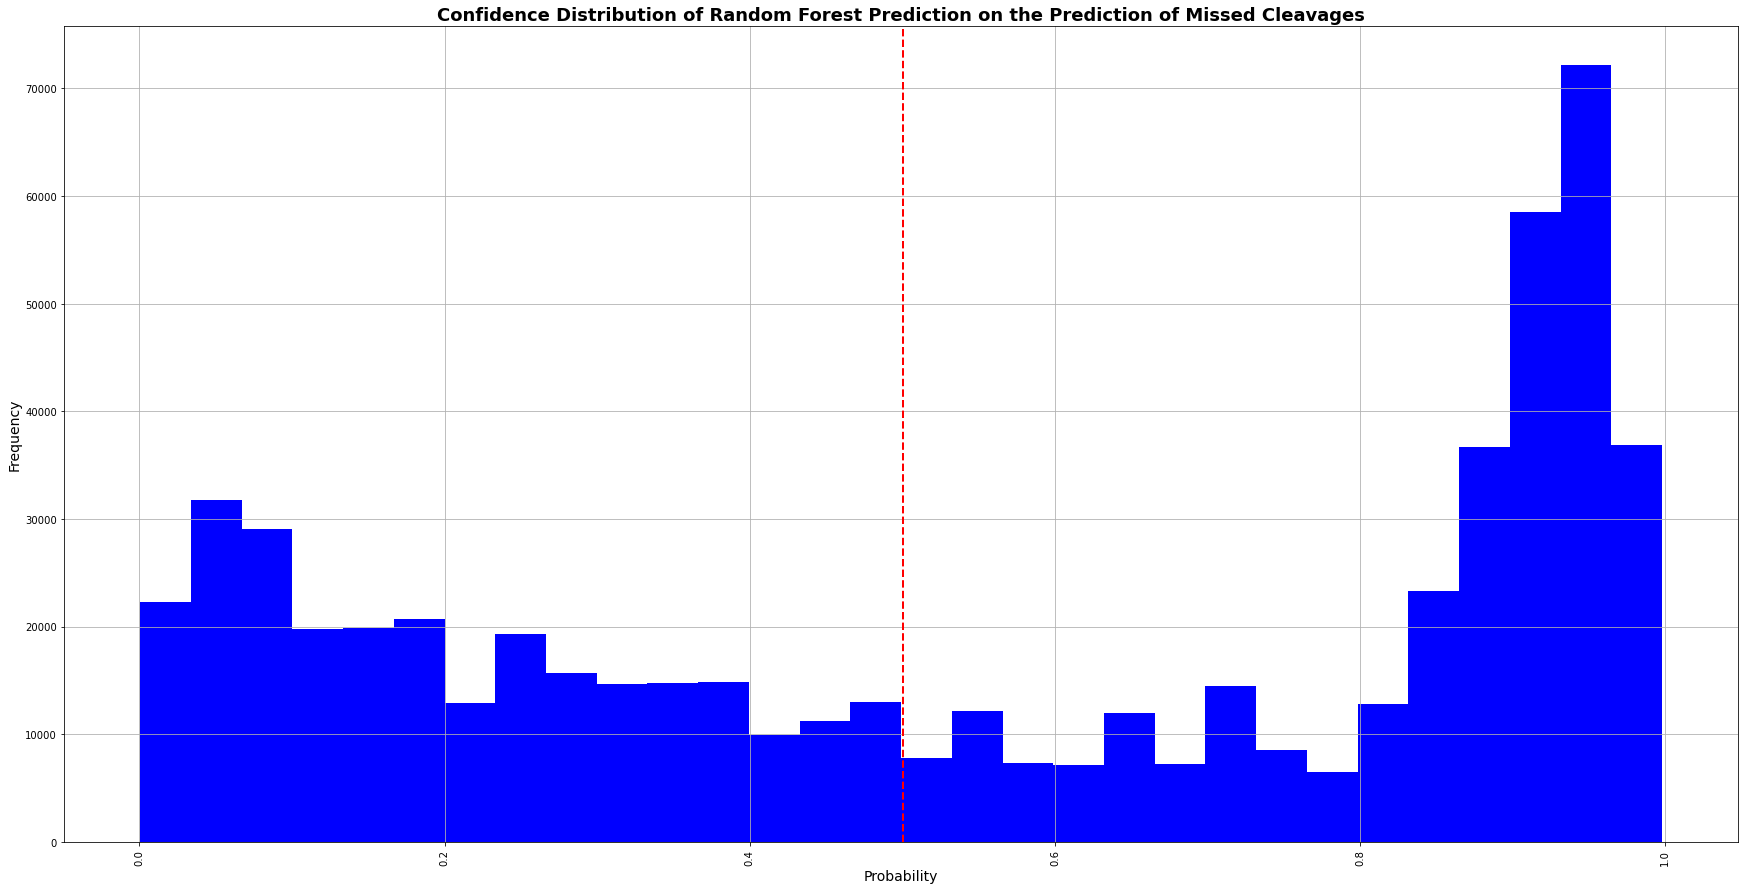

In [157]:
# Sort the Order_df dataframe by the 'end' column
Order_df = merged_df.sort_values('Probability')


# Create a figure and an axis object for the plot
fig, ax1 = plt.subplots(figsize=(30, 15))

# Add a histogram to the axis object
ax1.hist(Order_df['Probability'], bins=30, color='blue')
ax1.set_xlabel('Probability', fontsize=14)
ax1.set_ylabel('Frequency', fontsize=14)
plt.title('Confidence Distribution of Random Forest Prediction on the Prediction of Missed Cleavages', fontsize=18, fontweight='bold')

# Customize the appearance of the plot
ax1.set_ylim(0)  # Set the y-axis limits for the first axis

# Add a vertical line at the threshold value
#threshold = 0.5
ax1.axvline(threshold, color='red', linestyle='dashed', linewidth=2)

# rotate x-axis label
plt.xticks(rotation=90)

# Add grid
plt.grid(True)

# Display plot
plt.show()

In [158]:
# Set the threshold value
threshold = float(input('Input threshold:'))

# Filter the dataframe based on the threshold value
filtered_df = merged_df[merged_df['Probability'] > threshold]

# Print the filtered dataframe
print(filtered_df)

Input threshold: 0.5001308


       ProteinID  start   end              cleavage_sites  Cleavage  \
500       P30622   1084  1100           AAQTAEDAMQIMEQMTK         0   
501       Q9NUQ3     52    77  ADMLCNSQSNDILQHQGSNCGGTSNK         0   
502       Q96I24      2    15              AELVQGQSAPVGMK         0   
503       Q00653    104   112                   AHAHSLVGK         0   
504       Q13586    582   592                 ALLALNHGLDK         0   
...          ...    ...   ...                         ...       ...   
592743    P49411    204   230          GEETPVIVGSALCALEGR         1   
592744    P49411    213   230          GEETPVIVGSALCALEGR         1   
592745    P49411    213   237          GEETPVIVGSALCALEGR         1   
592746    Q9NX55     46    62           EIQSSNLETAMSVIGDR         1   
592747    Q9NX55     46    63           EIQSSNLETAMSVIGDR         1   

        Prediction  Probability  
500              1     0.936336  
501              1     0.936336  
502              1     0.936336  
503        

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


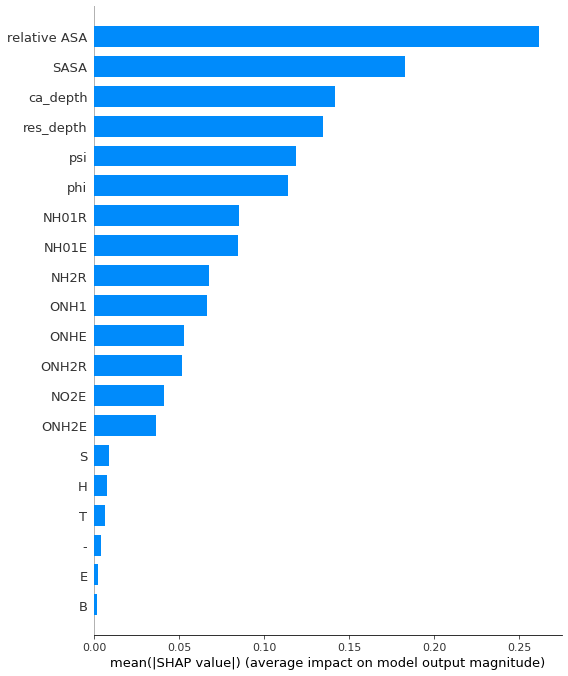

In [159]:
# Generate SHAP values using TreeExplainer
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test, check_additivity=False)

# Plot detailed feature importance
shap.summary_plot(shap_values, X_test, plot_type="bar")
plt.show()


In [160]:
#The accuracy only lowers when bootstrap validation is lowered

Feature Selection and Engineering: Identify the most relevant features that contribute to the accuracy of the model. Use techniques such as correlation analysis, feature importance ranking, or domain knowledge to select the most informative features. Additionally, consider creating new features that capture important relationships in the data.

Ensemble Methods: Consider using ensemble methods like bagging, boosting, or stacking to combine predictions from multiple models. Ensemble methods often lead to better accuracy by reducing bias and variance.

Threshold Adjustment: Based on the accuracy threshold curve, select an appropriate probability threshold for your model's predictions. You may need to adjust the threshold to achieve the desired balance between false positives and false negatives, depending on the problem's specific requirements.

Collect Sufficient Data: Ensure that you have a sufficient amount of high-quality data for training your model. More data can help improve generalization and reduce overfitting.